In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\EXPLORATORY DATA ANALYSIS\Spotify_2024_Global_Streaming_Data.csv")

df

Country        Artist                    Album      Genre  \
0          Germany  Taylor Swift  1989 (Taylor's Version)      K-pop   
1           Brazil    The Weeknd              After Hours        R&B   
2    United States   Post Malone                   Austin  Reggaeton   
3            Italy    Ed Sheeran        Autumn Variations      K-pop   
4            Italy    Ed Sheeran        Autumn Variations        R&B   
..             ...           ...                      ...        ...   
495         Brazil       Karol G       MAÑANA SERÁ BONITO       Jazz   
496         Canada      Dua Lipa         Future Nostalgia  Classical   
497        Germany       Karol G       MAÑANA SERÁ BONITO       Rock   
498         Canada           SZA                      SOS      Indie   
499         Sweden           BTS                    Proof  Reggaeton   

     Release Year  Monthly Listeners (Millions)  Total Streams (Millions)  \
0            2019                         23.10                   3695.53   
1            2022                         60.60                   2828.16   
2            2023                         42.84                   1425.46   
3            2018                         73.24                   2704.33   
4            2023                          7.89                   3323.25   
..            ...                           ...                       ...   
495          2018                         18.80                   2947.97   
496          2023                         89.68                   4418.61   
497          2023                         36.93                   2642.90   
498          2022                         87.26                   4320.23   
499          2018                         89.96                   4804.15   

     Total Hours Streamed (Millions)  Avg Stream Duration (Min) Platform Type  \
0                           14240.35                       4.28          Free   
1                           11120.44                       3.90       Premium   
2                            4177.49                       4.03          Free   
3                           12024.08                       3.26       Premium   
4                           13446.32                       4.47          Free   
..                               ...                        ...           ...   
495                         12642.83                       3.59       Premium   
496                         11843.46                       3.15          Free   
497                          8637.46                       4.08          Free   
498                         12201.40                       2.79          Free   
499                         12044.32                       4.03          Free   

     Streams Last 30 Days (Millions)  Skip Rate (%)  
0                             118.51           2.24  
1                              44.87          23.98  
2                              19.46           4.77  
3                             166.05          25.12  
4                             173.43          15.82  
..                               ...            ...  
495                            83.30          18.58  
496                           143.96           5.82  
497                            76.36          15.84  
498                            84.50          13.07  
499                            92.27          34.36  

[500 rows x 12 columns]

In [2]:
# 1. Fix genres
Genre_corrections = {
    "Taylor Swift": "Pop",
    "Post Malone": "Hip Hop",
    "Ed Sheeran": "Pop",
    "BLACKPINK": "K-pop",
    "The Weeknd": "R&B",
    "Billie Eilish": "Pop",
    "Bad Bunny": "Reggaeton",
    "Doja Cat": "Pop",
    "Ariana Grande": "Pop",
    "Dua Lipa": "Pop",
    "SZA": "R&B",
    "Karol G": "Reggaeton",
    "BTS": "K-pop",
    "Drake": "Hip Hop",
    "Olivia Rodrigo": "Pop"
}
df["Genre"] = df.apply(lambda x: Genre_corrections.get(x["Artist"], x["Genre"]), axis=1)

# 2. Remove duplicates
df = df.groupby(["Country", "Artist", "Album", "Release Year", "Platform Type"]).agg({
    "Monthly Listeners (Millions)": "mean",
    "Total Streams (Millions)": "sum",
    "Total Hours Streamed (Millions)": "sum",
    "Avg Stream Duration (Min)": "mean",
    "Streams Last 30 Days (Millions)": "sum",
    "Skip Rate (%)": "mean"
}).reset_index()

# 3. Correct release years
release_year_corrections = {
    "1989 (Taylor's Version)": 2023,
    "Autumn Variations": 2023,
    "After Hours": 2020,
    "Happier Than Ever": 2021,
    "Nadie Sabe Lo Que Va a Pasar Mañana": 2023,
    "Scarlet": 2023,
    "Eternal Sunshine": 2024,
    "Future Nostalgia": 2020,
    "BORN PINK": 2022,
    "SOS": 2022,
    "MAÑANA SERÁ BONITO": 2023,
    "Proof": 2022,
    "For All The Dogs": 2023,
    "Guts": 2023,
    "Austin": 2023
}
df["Release Year"] = df.apply(lambda x: release_year_corrections.get(x["Album"], x["Release Year"]), axis=1)

# 4. Handle missing/outlier values
df = df.dropna()  # Remove rows with missing values
for col in ["Monthly Listeners (Millions)", "Total Streams (Millions)", "Skip Rate (%)"]:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    df = df[~((df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr))]  # Remove outliers

# 5. Ensure data types
df = df.astype({
    "Monthly Listeners (Millions)": float,
    "Total Streams (Millions)": float,
    "Total Hours Streamed (Millions)": float,
    "Avg Stream Duration (Min)": float,
    "Streams Last 30 Days (Millions)": float,
    "Skip Rate (%)": float,
    "Release Year": int
})

# 6. Standardize categorical columns
df["Country"] = df["Country"].str.title()
df["Platform Type"] = df["Platform Type"].str.capitalize()
df = df[df["Platform Type"].isin(["Free", "Premium"])]

# Save cleaned data
df.to_csv("Spotify_2024_Global_Streaming_Data_Cleaned.csv", index=False)

# Preview cleaned data

df

Country          Artist               Album  Release Year  \
0        Argentina   Ariana Grande    Eternal Sunshine          2024   
1        Argentina   Ariana Grande    Eternal Sunshine          2024   
2        Argentina   Ariana Grande    Eternal Sunshine          2024   
3        Argentina       BLACKPINK           BORN PINK          2022   
4        Argentina       BLACKPINK           BORN PINK          2022   
..             ...             ...                 ...           ...   
460  United States      Ed Sheeran   Autumn Variations          2023   
461  United States         Karol G  MAÑANA SERÁ BONITO          2023   
462  United States         Karol G  MAÑANA SERÁ BONITO          2023   
463  United States  Olivia Rodrigo                Guts          2023   
464  United States     Post Malone              Austin          2023   

    Platform Type  Monthly Listeners (Millions)  Total Streams (Millions)  \
0            Free                         27.47                   2014.64   
1         Premium                         82.55                   4906.61   
2         Premium                         65.27                   2634.12   
3         Premium                         18.90                   3479.59   
4         Premium                         59.11                   1772.23   
..            ...                           ...                       ...   
460          Free                         96.74                   3925.37   
461       Premium                         57.21                   3798.55   
462          Free                          8.23                   2147.30   
463          Free                         38.25                   3703.51   
464          Free                         42.84                   1425.46   

     Total Hours Streamed (Millions)  Avg Stream Duration (Min)  \
0                            6539.73                       3.31   
1                           12352.92                       3.84   
2                            8536.54                       2.59   
3                           13046.66                       4.31   
4                            7427.48                       3.73   
..                               ...                        ...   
460                         15906.87                       3.66   
461                         10829.63                       4.21   
462                          8376.12                       3.58   
463                         11536.51                       2.91   
464                          4177.49                       4.03   

     Streams Last 30 Days (Millions)  Skip Rate (%)  
0                             198.06           9.81  
1                              48.83          26.05  
2                              46.67          32.29  
3                               9.69          15.21  
4                             183.82          24.02  
..                               ...            ...  
460                           117.12           7.65  
461                           165.57          21.10  
462                           186.98           3.69  
463                            84.54          38.49  
464                            19.46           4.77  

[460 rows x 11 columns]

In [3]:
import pandas as pd

# Load data
df = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\EXPLORATORY DATA ANALYSIS\Spotify_2024_Global_Streaming_Data.csv")

# Print column names for debugging
print("Columns in the dataset:", df.columns.tolist())

# 1. Fix genres (only if Genre column exists)
genre_corrections = {
    "Taylor Swift": "Pop",
    "Post Malone": "Hip Hop",
    "Ed Sheeran": "Pop",
    "BLACKPINK": "K-pop",
    "The Weeknd": "R&B",
    "Billie Eilish": "Pop",
    "Bad Bunny": "Reggaeton",
    "Doja Cat": "Pop",
    "Ariana Grande": "Pop",
    "Dua Lipa": "Pop",
    "SZA": "R&B",
    "Karol G": "Reggaeton",
    "BTS": "K-pop",
    "Drake": "Hip Hop",
    "Olivia Rodrigo": "Pop"
}

if "Genre" in df.columns:
    df["Genre"] = df.apply(lambda x: genre_corrections.get(x["Artist"], x["Genre"]), axis=1)
else:
    print("Genre column not found. Creating Genre column based on Artist.")
    df["Genre"] = df["Artist"].map(genre_corrections)
    # Handle unmapped artists (assign 'Unknown' or keep as is)
    df["Genre"] = df["Genre"].fillna("Unknown")

# 2. Remove duplicates
# Include Genre in groupby if it exists
group_cols = ["Country", "Artist", "Album", "Release Year", "Platform Type"]
if "Genre" in df.columns:
    group_cols.append("Genre")

df = df.groupby(group_cols).agg({
    "Monthly Listeners (Millions)": "mean",
    "Total Streams (Millions)": "sum",
    "Total Hours Streamed (Millions)": "sum",
    "Avg Stream Duration (Min)": "mean",
    "Streams Last 30 Days (Millions)": "sum",
    "Skip Rate (%)": "mean"
}).reset_index()

# 3. Correct release years
release_year_corrections = {
    "1989 (Taylor's Version)": 2023,
    "Autumn Variations": 2023,
    "After Hours": 2020,
    "Happier Than Ever": 2021,
    "Nadie Sabe Lo Que Va a Pasar Mañana": 2023,
    "Scarlet": 2023,
    "Eternal Sunshine": 2024,
    "Future Nostalgia": 2020,
    "BORN PINK": 2022,
    "SOS": 2022,
    "MAÑANA SERÁ BONITO": 2023,
    "Proof": 2022,
    "For All The Dogs": 2023,
    "Guts": 2023,
    "Austin": 2023
}
df["Release Year"] = df.apply(lambda x: release_year_corrections.get(x["Album"], x["Release Year"]), axis=1)

# 4. Handle missing/outlier values
df = df.dropna()  # Remove rows with missing values
for col in ["Monthly Listeners (Millions)", "Total Streams (Millions)", "Skip Rate (%)"]:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    df = df[~((df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr))]  # Remove outliers

# 5. Ensure data types
df = df.astype({
    "Monthly Listeners (Millions)": float,
    "Total Streams (Millions)": float,
    "Total Hours Streamed (Millions)": float,
    "Avg Stream Duration (Min)": float,
    "Streams Last 30 Days (Millions)": float,
    "Skip Rate (%)": float,
    "Release Year": int
})

# 6. Standardize categorical columns
df["Country"] = df["Country"].str.title()
df["Platform Type"] = df["Platform Type"].str.capitalize()
if "Genre" in df.columns:
    df["Genre"] = df["Genre"].str.title()
df = df[df["Platform Type"].isin(["Free", "Premium"])]

# 7. Final duplicate check
df = df.groupby(group_cols).agg({
    "Monthly Listeners (Millions)": "mean",
    "Total Streams (Millions)": "sum",
    "Total Hours Streamed (Millions)": "sum",
    "Avg Stream Duration (Min)": "mean",
    "Streams Last 30 Days (Millions)": "sum",
    "Skip Rate (%)": "mean"
}).reset_index()

# Save cleaned data
df.to_csv("Spotify_2024_Global_Streaming_Data_Cleaned.csv", index=False)

# Preview cleaned data
print("\nCleaned DataFrame Preview:")
print(df)
print("\nShape of Cleaned DataFrame:", df.shape)

# Check for duplicates
print("\nNumber of duplicates:", df.duplicated(subset=["Country", "Artist", "Album", "Release Year", "Platform Type"]).sum())

Columns in the dataset: ['Country', 'Artist', 'Album', 'Genre', 'Release Year', 'Monthly Listeners (Millions)', 'Total Streams (Millions)', 'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)', 'Platform Type', 'Streams Last 30 Days (Millions)', 'Skip Rate (%)']

Cleaned DataFrame Preview:
           Country          Artist                                Album  \
0        Argentina   Ariana Grande                     Eternal Sunshine   
1        Argentina   Ariana Grande                     Eternal Sunshine   
2        Argentina       BLACKPINK                            BORN PINK   
3        Argentina       Bad Bunny  Nadie Sabe Lo Que Va a Pasar Mañana   
4        Argentina   Billie Eilish                    Happier Than Ever   
..             ...             ...                                  ...   
335  United States      Ed Sheeran                    Autumn Variations   
336  United States         Karol G                   MAÑANA SERÁ BONITO   
337  United States      

# Which artists have the highest total streams across all countries?

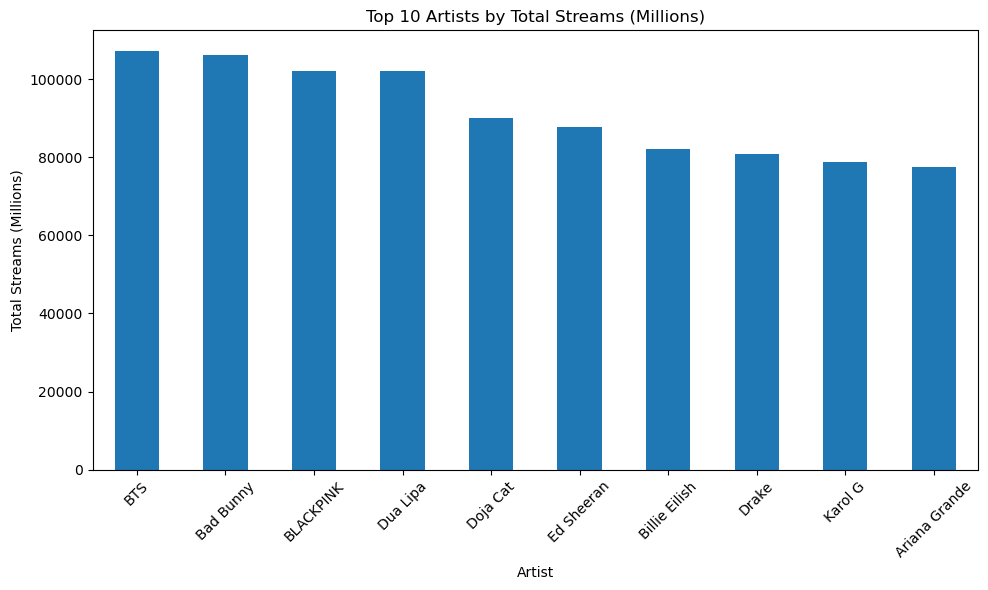

In [4]:
import matplotlib.pyplot as plt

# Group by Artist and sum streams
top_artists = df.groupby("Artist")["Total Streams (Millions)"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_artists.plot(kind="bar", title="Top 10 Artists by Total Streams (Millions)")
plt.xlabel("Artist")
plt.ylabel("Total Streams (Millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# How does skip rate vary by platform type and genre?

<Figure size 1200x600 with 0 Axes>

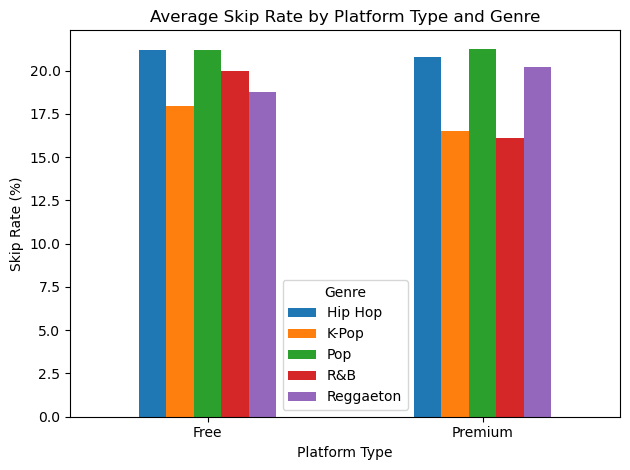

In [5]:
# Group by Platform Type and Genre
skip_by_platform_genre = df.groupby(["Platform Type", "Genre"])["Skip Rate (%)"].mean().unstack()

# Plot
plt.figure(figsize=(12, 6))
skip_by_platform_genre.plot(kind="bar", title="Average Skip Rate by Platform Type and Genre")
plt.xlabel("Platform Type")
plt.ylabel("Skip Rate (%)")
plt.xticks(rotation=0)
plt.legend(title="Genre")
plt.tight_layout()
plt.show()

# Which countries have the highest streaming volume, and which genres dominate?

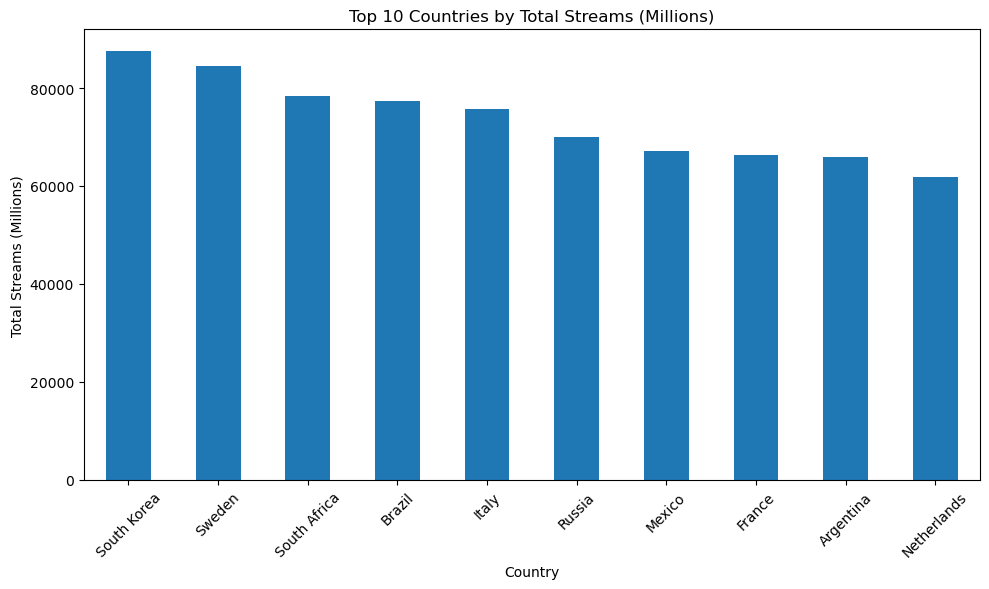

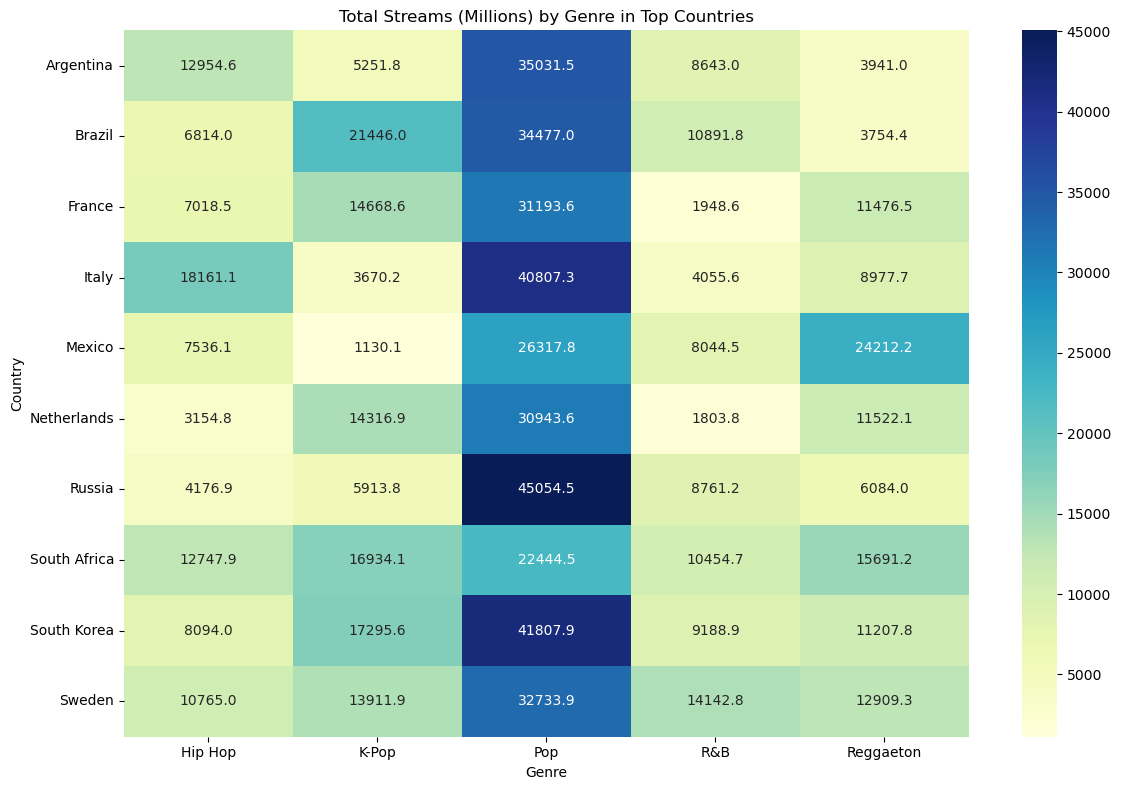

In [6]:
# Top countries by streams
top_countries = df.groupby("Country")["Total Streams (Millions)"].sum().sort_values(ascending=False).head(10)

# Plot top countries
plt.figure(figsize=(10, 6))
top_countries.plot(kind="bar", title="Top 10 Countries by Total Streams (Millions)")
plt.xlabel("Country")
plt.ylabel("Total Streams (Millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top genres by country
top_genres_by_country = df[df["Country"].isin(top_countries.index)].groupby(["Country", "Genre"])["Total Streams (Millions)"].sum().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
import seaborn as sns
sns.heatmap(top_genres_by_country, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Total Streams (Millions) by Genre in Top Countries")
plt.xlabel("Genre")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Which albums have the highest average stream duration, and how does this relate to their skip rate?

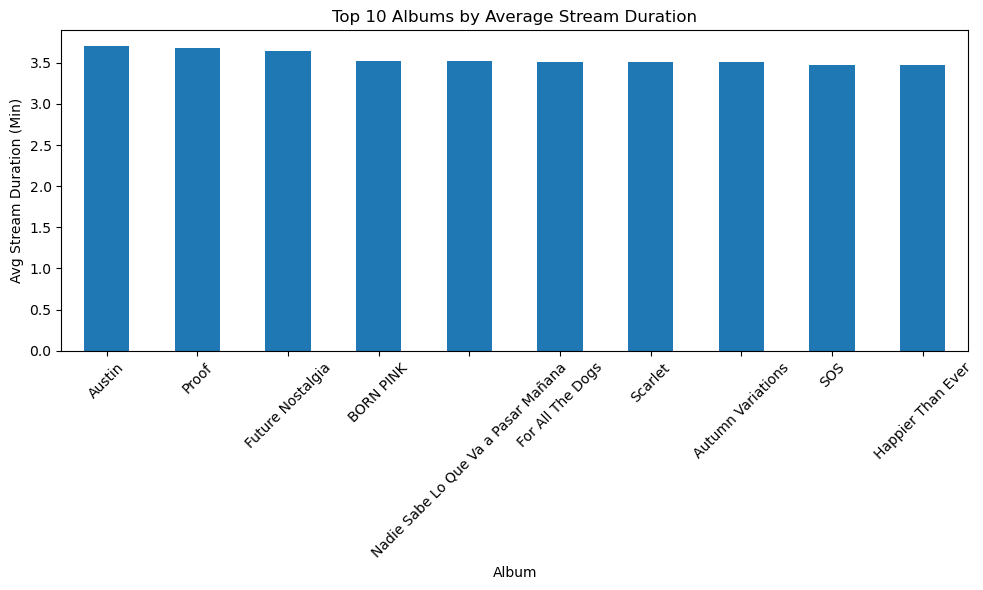

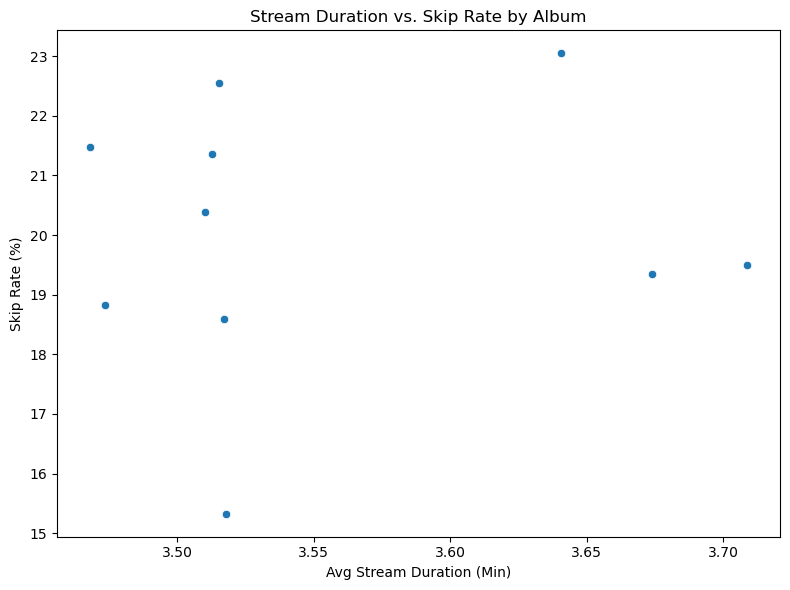

Correlation between Avg Stream Duration and Skip Rate: 0.07


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Album
album_engagement = df.groupby("Album").agg({
    "Avg Stream Duration (Min)": "mean",
    "Skip Rate (%)": "mean"
}).sort_values(by="Avg Stream Duration (Min)", ascending=False).head(10)

# Plot top albums by stream duration
plt.figure(figsize=(10, 6))
album_engagement["Avg Stream Duration (Min)"].plot(kind="bar", title="Top 10 Albums by Average Stream Duration")
plt.xlabel("Album")
plt.ylabel("Avg Stream Duration (Min)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot of duration vs. skip rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Avg Stream Duration (Min)", y="Skip Rate (%)", data=album_engagement)
plt.title("Stream Duration vs. Skip Rate by Album")
plt.xlabel("Avg Stream Duration (Min)")
plt.ylabel("Skip Rate (%)")
plt.tight_layout()
plt.show()

# Correlation
correlation = album_engagement.corr().iloc[0, 1]
print(f"Correlation between Avg Stream Duration and Skip Rate: {correlation:.2f}")

# How do monthly listeners compare to total streams for artists, and which artists have the highest listener-to-stream ratio?

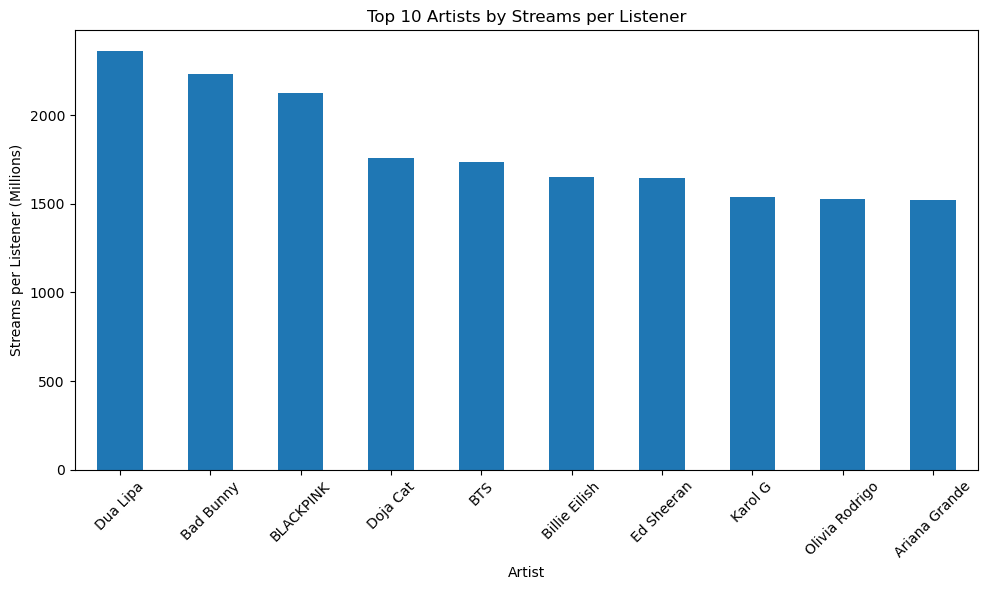

                Monthly Listeners (Millions)  Total Streams (Millions)  \
Artist                                                                   
Dua Lipa                           43.287235                 102229.68   
Bad Bunny                          47.543500                 106216.16   
BLACKPINK                          48.083800                 102238.89   
Doja Cat                           51.162917                  90098.83   
BTS                                61.797862                 107202.79   
Billie Eilish                      49.667536                  82174.91   
Ed Sheeran                         53.432500                  87859.35   
Karol G                            51.203750                  78846.49   
Olivia Rodrigo                     49.278106                  75219.29   
Ariana Grande                      50.895455                  77463.84   

                Streams per Listener  
Artist                                
Dua Lipa                 2361.658

In [8]:
# Group by Artist
artist_metrics = df.groupby("Artist").agg({
    "Monthly Listeners (Millions)": "mean",
    "Total Streams (Millions)": "sum"
})
artist_metrics["Streams per Listener"] = artist_metrics["Total Streams (Millions)"] / artist_metrics["Monthly Listeners (Millions)"]
top_ratios = artist_metrics.sort_values("Streams per Listener", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_ratios["Streams per Listener"].plot(kind="bar", title="Top 10 Artists by Streams per Listener")
plt.xlabel("Artist")
plt.ylabel("Streams per Listener (Millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(top_ratios[["Monthly Listeners (Millions)", "Total Streams (Millions)", "Streams per Listener"]])

# Which countries show the highest growth in streams over the last 30 days compared to total streams?

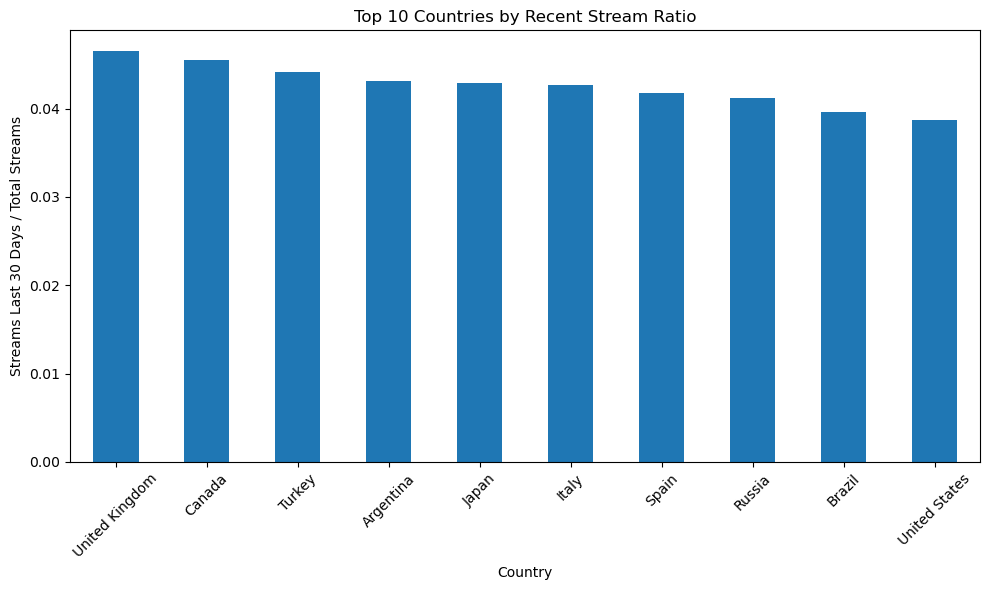

                Total Streams (Millions)  Streams Last 30 Days (Millions)  \
Country                                                                     
United Kingdom                  52345.50                          2435.31   
Canada                          52159.31                          2374.26   
Turkey                          46685.95                          2062.21   
Argentina                       65821.91                          2834.22   
Japan                           57581.13                          2471.66   
Italy                           75671.88                          3227.25   
Spain                           58007.33                          2423.92   
Russia                          69990.43                          2886.25   
Brazil                          77383.15                          3063.11   
United States                   51590.78                          1997.59   

                Recent Stream Ratio  
Country                              

In [9]:
# Group by Country
country_growth = df.groupby("Country").agg({
    "Total Streams (Millions)": "sum",
    "Streams Last 30 Days (Millions)": "sum"
})
country_growth["Recent Stream Ratio"] = country_growth["Streams Last 30 Days (Millions)"] / country_growth["Total Streams (Millions)"]
top_growth = country_growth.sort_values("Recent Stream Ratio", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_growth["Recent Stream Ratio"].plot(kind="bar", title="Top 10 Countries by Recent Stream Ratio")
plt.xlabel("Country")
plt.ylabel("Streams Last 30 Days / Total Streams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(top_growth[["Total Streams (Millions)", "Streams Last 30 Days (Millions)", "Recent Stream Ratio"]])

# Are there countries where specific artists dominate streaming volume disproportionately?

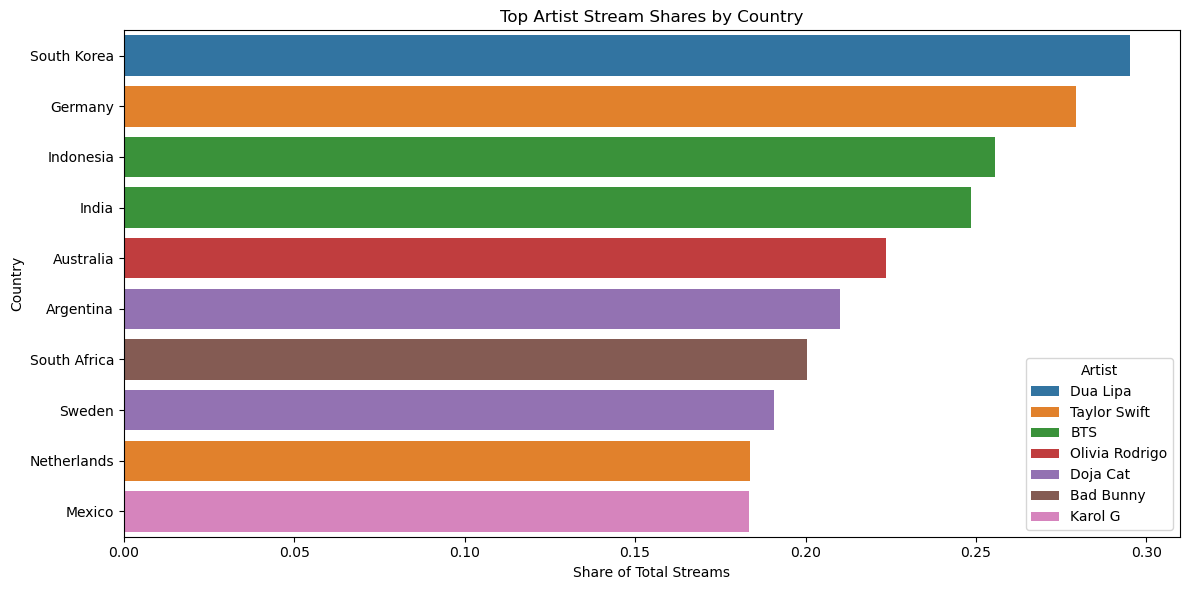

          Country          Artist  Total Streams (Millions)  Share of Streams
174   South Korea        Dua Lipa                  25851.75          0.295131
72        Germany    Taylor Swift                  14742.16          0.279226
85      Indonesia             BTS                  14527.22          0.255617
75          India             BTS                  12956.59          0.248622
19      Australia  Olivia Rodrigo                   7328.19          0.223716
4       Argentina        Doja Cat                  13830.65          0.210122
159  South Africa       Bad Bunny                  15691.24          0.200469
200        Sweden        Doja Cat                  16106.41          0.190692
140   Netherlands    Taylor Swift                  11347.99          0.183799
126        Mexico         Karol G                  12341.07          0.183536


In [10]:
# Total streams per country
country_totals = df.groupby("Country")["Total Streams (Millions)"].sum()

# Streams by artist and country
artist_country = df.groupby(["Country", "Artist"])["Total Streams (Millions)"].sum().reset_index()
artist_country["Share of Streams"] = artist_country.apply(
    lambda x: x["Total Streams (Millions)"] / country_totals[x["Country"]], axis=1
)
top_shares = artist_country.sort_values("Share of Streams", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Share of Streams", y="Country", hue="Artist", data=top_shares)
plt.title("Top Artist Stream Shares by Country")
plt.xlabel("Share of Total Streams")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

print(top_shares)

# User Behavior
# Does total hours streamed correlate with skip rate across genres?

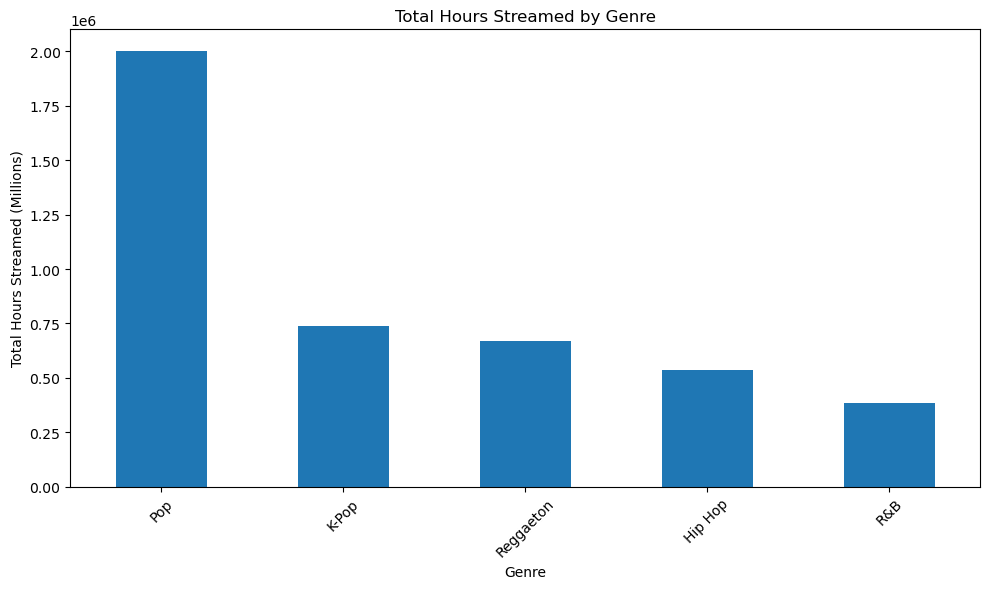

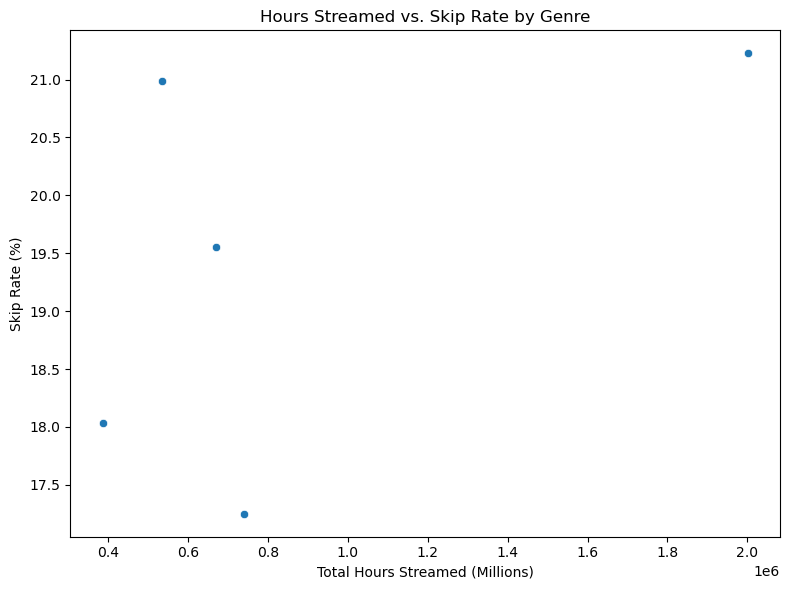

Correlation between Hours Streamed and Skip Rate: 0.54


In [11]:
# Group by Genre
genre_engagement = df.groupby("Genre").agg({
    "Total Hours Streamed (Millions)": "sum",
    "Skip Rate (%)": "mean"
}).sort_values("Total Hours Streamed (Millions)", ascending=False)

# Plot hours streamed
plt.figure(figsize=(10, 6))
genre_engagement["Total Hours Streamed (Millions)"].plot(kind="bar", title="Total Hours Streamed by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Hours Streamed (Millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot of hours vs. skip rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Total Hours Streamed (Millions)", y="Skip Rate (%)", data=genre_engagement)
plt.title("Hours Streamed vs. Skip Rate by Genre")
plt.xlabel("Total Hours Streamed (Millions)")
plt.ylabel("Skip Rate (%)")
plt.tight_layout()
plt.show()

# Correlation
correlation = genre_engagement.corr().iloc[0, 1]
print(f"Correlation between Hours Streamed and Skip Rate: {correlation:.2f}")

# How does skip rate vary by release year, and are newer releases skipped more often?

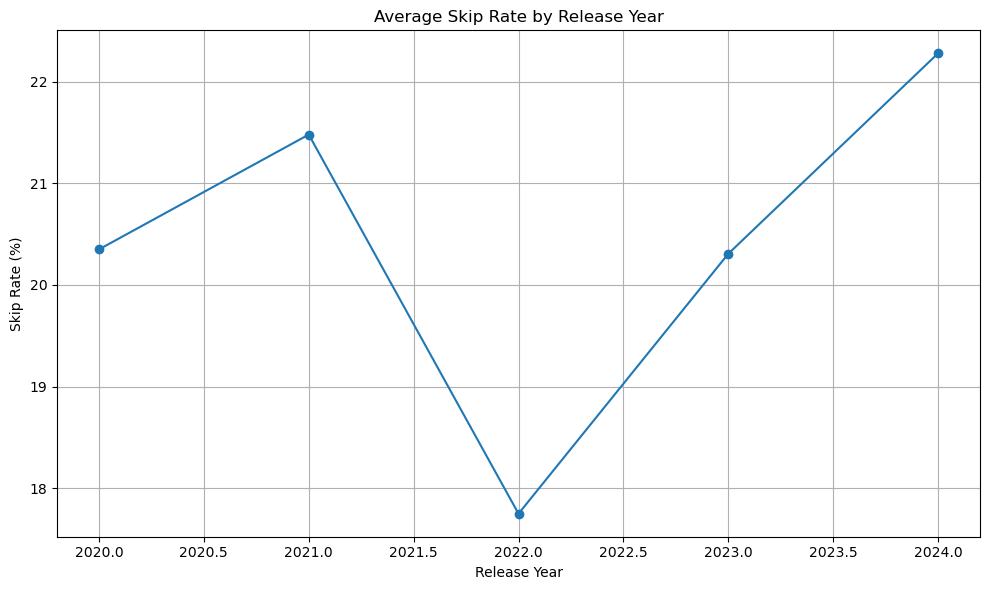

Release Year
2020    20.350365
2021    21.480797
2022    17.747970
2023    20.307095
2024    22.280568
Name: Skip Rate (%), dtype: float64


In [12]:
# Group by Release Year
skip_by_year = df.groupby("Release Year")["Skip Rate (%)"].mean().sort_index()

# Plot
plt.figure(figsize=(10, 6))
skip_by_year.plot(kind="line", marker="o", title="Average Skip Rate by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Skip Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

print(skip_by_year)

# Do Free users contribute more to recent streams (last 30 days) than Premium users for certain artists? 

In [ ]:
# Group by Artist and Platform Type
recent_streams = df.groupby(["Artist", "Platform Type"])["Streams Last 30 Days (Millions)"].sum().unstack()
recent_streams["Free Share"] = recent_streams["Free"] / (recent_streams["Free"] + recent_streams["Premium"])
top_free = recent_streams.sort_values("Free Share", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_free["Free Share"].plot(kind="bar", title="Top 10 Artists by Free User Recent Stream Share")
plt.xlabel("Artist")
plt.ylabel("Share of Streams Last 30 Days (Free)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(top_free[["Free", "Premium", "Free Share"]])

# Which genres have the highest streaming volume on Premium vs. Free platforms?

<Figure size 1200x600 with 0 Axes>

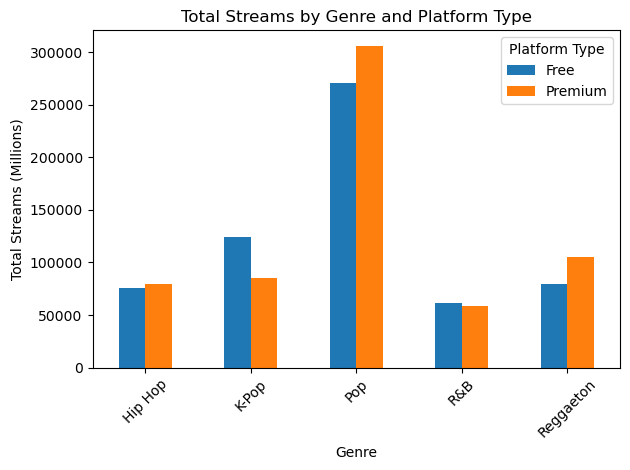

Platform Type       Free    Premium
Genre                              
Hip Hop         75914.54   79908.06
K-Pop          124291.22   85150.46
Pop            270871.54  305469.85
R&B             61837.99   58847.27
Reggaeton       79816.31  105246.34


In [14]:
# Group by Genre and Platform Type
genre_platform = df.groupby(["Genre", "Platform Type"])["Total Streams (Millions)"].sum().unstack()

# Plot
plt.figure(figsize=(12, 6))
genre_platform.plot(kind="bar", title="Total Streams by Genre and Platform Type")
plt.xlabel("Genre")
plt.ylabel("Total Streams (Millions)")
plt.xticks(rotation=45)
plt.legend(title="Platform Type")
plt.tight_layout()
plt.show()

print(genre_platform)

# Temporal Trends
# Which artists have maintained streaming consistency across countries over time (based on streams last 30 days vs. total streams)?

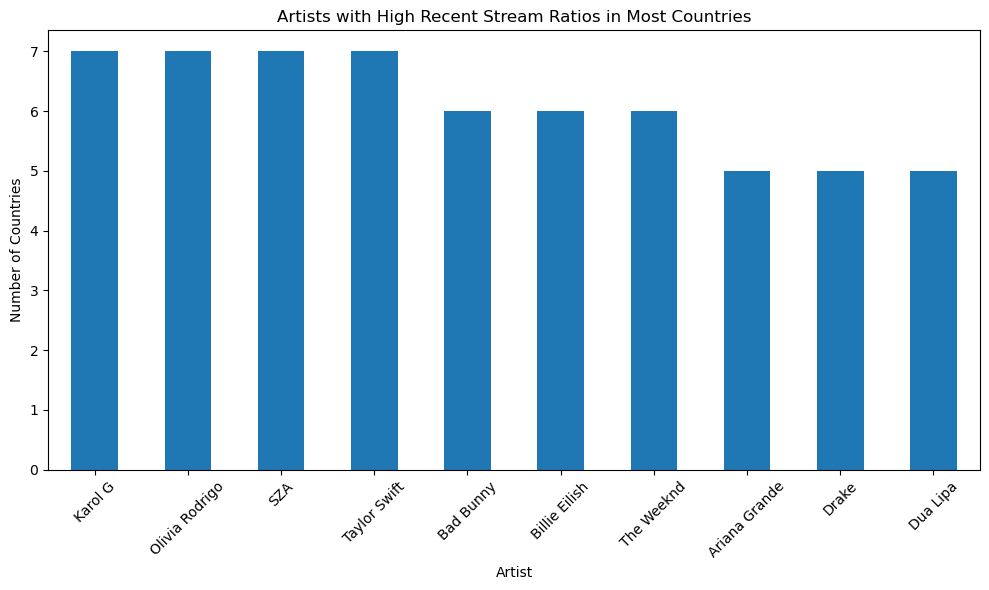

Artist
Karol G           7
Olivia Rodrigo    7
SZA               7
Taylor Swift      7
Bad Bunny         6
Billie Eilish     6
The Weeknd        6
Ariana Grande     5
Drake             5
Dua Lipa          5
dtype: int64


In [15]:
# Calculate recent stream ratio by Artist and Country
artist_country = df.groupby(["Artist", "Country"]).agg({
    "Total Streams (Millions)": "sum",
    "Streams Last 30 Days (Millions)": "sum"
})
artist_country["Recent Ratio"] = artist_country["Streams Last 30 Days (Millions)"] / artist_country["Total Streams (Millions)"]

# Count countries with high ratio (>0.05) per artist
consistent_artists = artist_country[artist_country["Recent Ratio"] > 0.05].groupby("Artist").size().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
consistent_artists.plot(kind="bar", title="Artists with High Recent Stream Ratios in Most Countries")
plt.xlabel("Artist")
plt.ylabel("Number of Countries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(consistent_artists)

# How has the popularity of genres evolved based on release year?

<Figure size 1200x600 with 0 Axes>

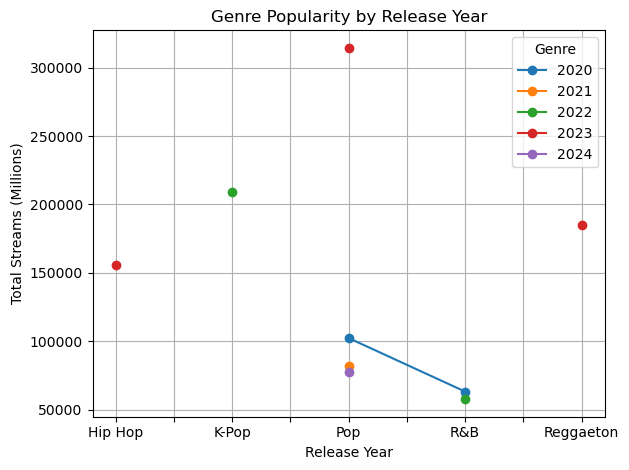

Release Year       2020      2021       2022       2023      2024
Genre                                                            
Hip Hop             NaN       NaN        NaN  155822.60       NaN
K-Pop               NaN       NaN  209441.68        NaN       NaN
Pop           102229.68  82174.91        NaN  314472.96  77463.84
R&B            63099.45       NaN   57585.81        NaN       NaN
Reggaeton           NaN       NaN        NaN  185062.65       NaN


In [16]:
# Group by Genre and Release Year
genre_year = df.groupby(["Genre", "Release Year"])["Total Streams (Millions)"].sum().unstack()

# Plot
plt.figure(figsize=(12, 6))
genre_year.plot(kind="line", marker="o", title="Genre Popularity by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Total Streams (Millions)")
plt.legend(title="Genre")
plt.grid(True)
plt.tight_layout()
plt.show()

print(genre_year)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind, f_oneway, tukey_hsd
import statsmodels.api as sm
from itertools import combinations

# Load the cleaned dataset
df = pd.read_csv("Spotify_2024_Global_Streaming_Data_Cleaned.csv")

# Set Seaborn style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10
})

# Display basic info
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          340 non-null    object 
 1   Artist                           340 non-null    object 
 2   Album                            340 non-null    object 
 3   Release Year                     340 non-null    int64  
 4   Platform Type                    340 non-null    object 
 5   Genre                            340 non-null    object 
 6   Monthly Listeners (Millions)     340 non-null    float64
 7   Total Streams (Millions)         340 non-null    float64
 8   Total Hours Streamed (Millions)  340 non-null    float64
 9   Avg Stream Duration (Min)        340 non-null    float64
 10  Streams Last 30 Days (Millions)  340 non-null    float64
 11  Skip Rate (%)                    340 non-null    float64
dtypes: float

# feature engineering

In [18]:
# Feature engineering
df['Engagement Ratio'] = df['Total Hours Streamed (Millions)'] / df['Total Streams (Millions)'] * 60  # Convert to minutes
df['Recent Popularity Index'] = df['Streams Last 30 Days (Millions)'] / df['Total Streams (Millions)']
df['Listener Efficiency'] = df['Total Streams (Millions)'] / df['Monthly Listeners (Millions)']
df['Normalized Skip Rate'] = df['Skip Rate (%)'] / df['Avg Stream Duration (Min)']

# Handle potential infinities or NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# Preview new features
print("\nNew Features Preview:")
print(df[['Artist', 'Engagement Ratio', 'Recent Popularity Index', 'Listener Efficiency', 'Normalized Skip Rate']].head())


New Features Preview:
          Artist  Engagement Ratio  Recent Popularity Index  \
0  Ariana Grande        194.766211                 0.098310   
1  Ariana Grande        166.213032                 0.012665   
2      BLACKPINK        233.909083                 0.036846   
3      Bad Bunny        174.383718                 0.030516   
4  Billie Eilish        217.962894                 0.175923   

   Listener Efficiency  Normalized Skip Rate  
0            73.339643              2.963746  
1           102.025842              9.073095  
2           134.644789              4.879353  
3            81.469697              6.247573  
4            56.251678              5.471074  


# CLUSTERING ANALYSIS

C:\Users\ADMIN\anaconda3\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


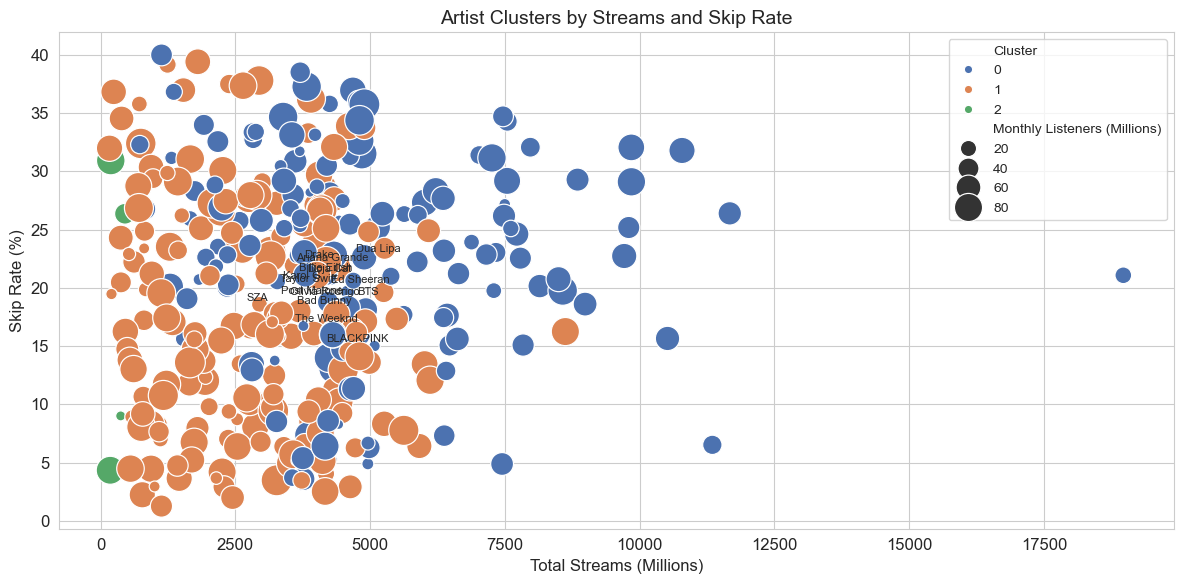


Cluster Summary:
    Cluster          Artist  Monthly Listeners (Millions)  \
0         0   Ariana Grande                     46.960000   
1         0       BLACKPINK                     37.534091   
2         0             BTS                     58.220076   
3         0       Bad Bunny                     44.859615   
4         0   Billie Eilish                     45.266333   
5         0        Doja Cat                     46.675909   
6         0           Drake                     37.005556   
7         0        Dua Lipa                     36.641731   
8         0      Ed Sheeran                     43.509375   
9         0         Karol G                     49.413333   
10        0  Olivia Rodrigo                     36.262500   
11        0     Post Malone                     37.351250   
12        0             SZA                     46.276296   
13        0    Taylor Swift                     38.683095   
14        0      The Weeknd                     39.641042   
15    

In [19]:
# Select features for clustering
cluster_features = [
    'Monthly Listeners (Millions)', 'Total Streams (Millions)', 
    'Skip Rate (%)', 'Engagement Ratio', 'Recent Popularity Index', 
    'Listener Efficiency'
]
X = df[cluster_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering (try 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Group by cluster and Artist
cluster_summary = df.groupby(['Cluster', 'Artist']).agg({
    'Monthly Listeners (Millions)': 'mean',
    'Total Streams (Millions)': 'sum',
    'Skip Rate (%)': 'mean',
    'Engagement Ratio': 'mean',
    'Recent Popularity Index': 'mean',
    'Listener Efficiency': 'mean'
}).reset_index()

# Plot clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Total Streams (Millions)', y='Skip Rate (%)', hue='Cluster', size='Monthly Listeners (Millions)', 
    data=df, palette='deep', sizes=(50, 500)
)
for i, row in df.groupby('Artist').mean(numeric_only=True).reset_index().iterrows():
    plt.text(row['Total Streams (Millions)'] + 100, row['Skip Rate (%)'], row['Artist'], fontsize=8)
plt.title('Artist Clusters by Streams and Skip Rate')
plt.xlabel('Total Streams (Millions)')
plt.ylabel('Skip Rate (%)')
plt.tight_layout()
plt.show()

print("\nCluster Summary:")
print(cluster_summary)

# CLUSTERING ANALYSIS 2

PCA Explained Variance Ratio: [0.26766232 0.21719716]
Silhouette Score for 3 Clusters: 0.173


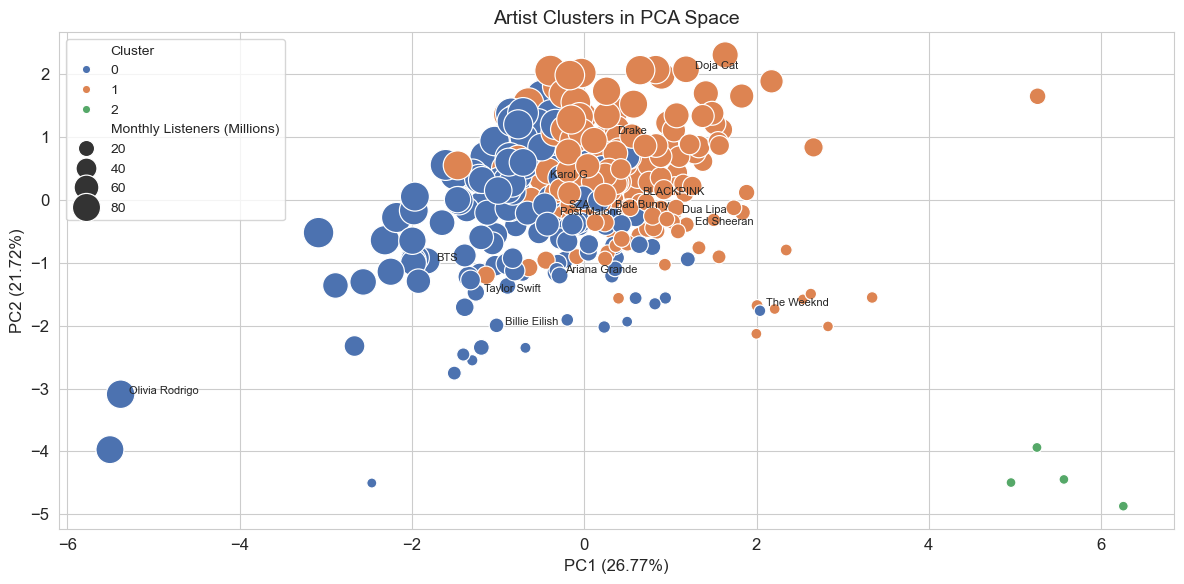


Cluster Summary:
    Cluster          Artist  Monthly Listeners (Millions)  \
0         0   Ariana Grande                     61.530000   
1         0       BLACKPINK                     56.630909   
2         0             BTS                     66.950909   
3         0       Bad Bunny                     49.595882   
4         0   Billie Eilish                     50.545000   
5         0        Doja Cat                     51.435000   
6         0           Drake                     67.073182   
7         0        Dua Lipa                     47.534444   
8         0      Ed Sheeran                     64.750000   
9         0         Karol G                     47.981538   
10        0  Olivia Rodrigo                     52.710595   
11        0     Post Malone                     58.406111   
12        0             SZA                     57.448333   
13        0    Taylor Swift                     52.543000   
14        0      The Weeknd                     62.540000   
15    

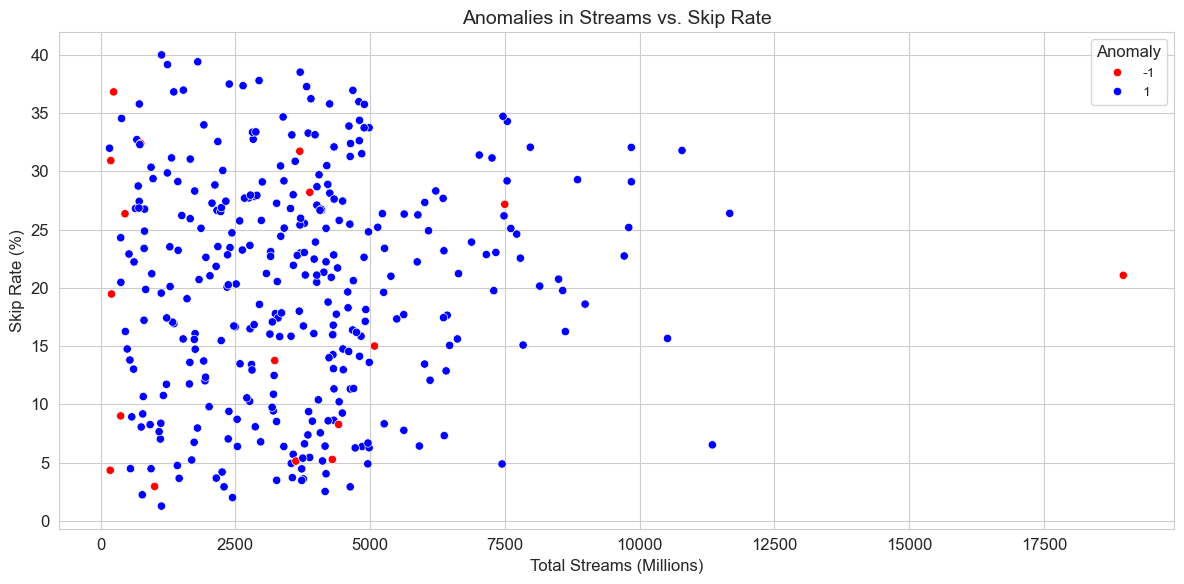


Optimized Random Forest Performance:
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error: 91.06
R² Score: -0.04


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11400\112081489.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette='viridis')


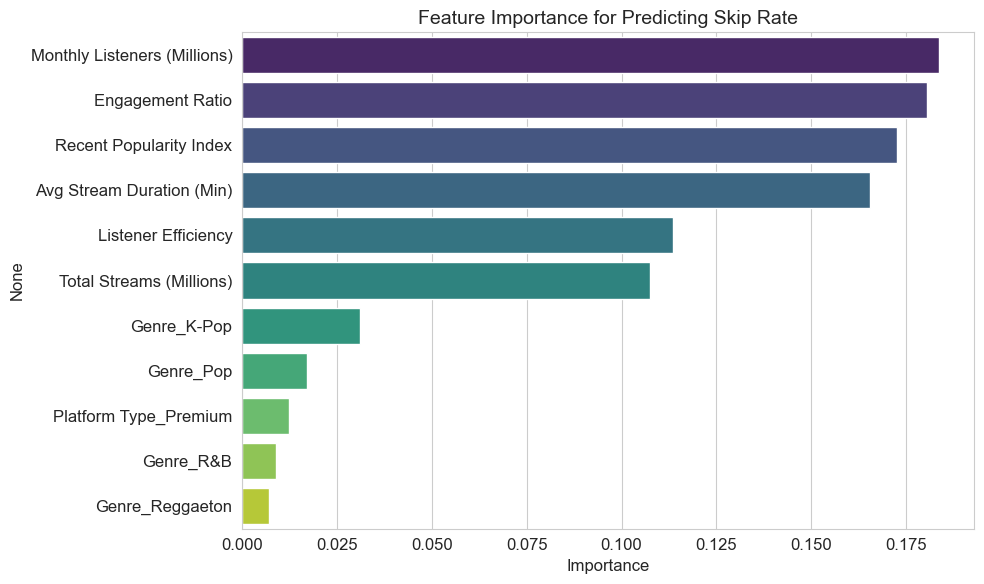

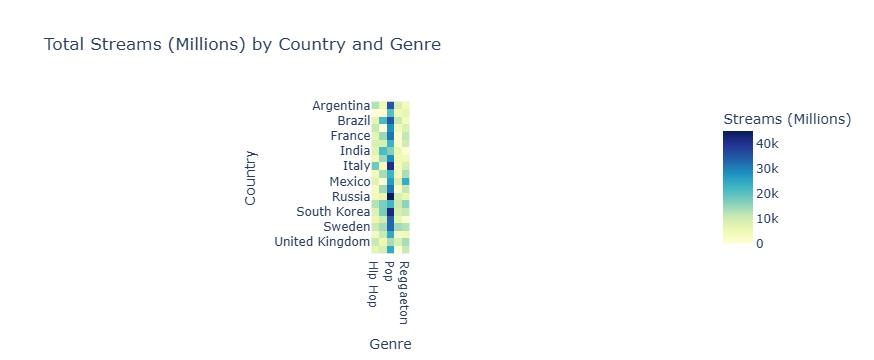


Kruskal-Wallis Test for Streams by Genre:
Statistic: 10.69, P-Value: 0.0303


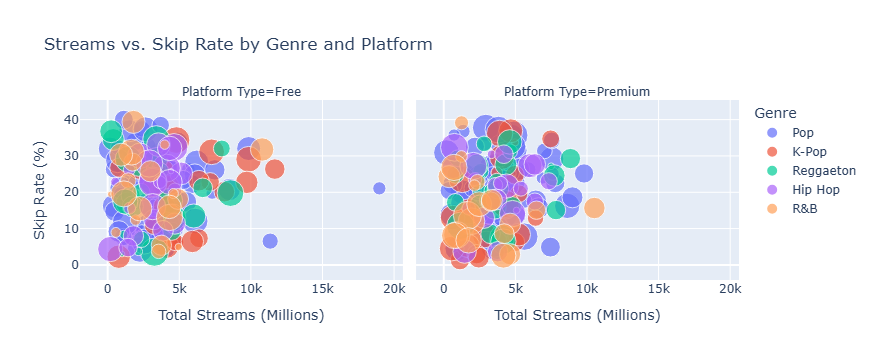

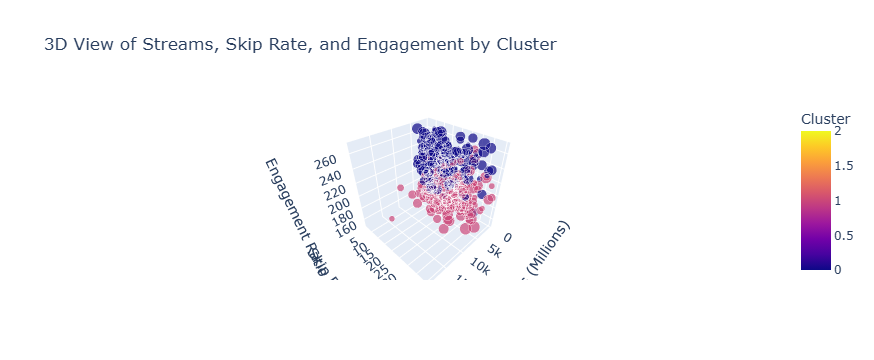

In [20]:
import os
os.environ["OMP_NUM_THREADS"] = "2"  # Suppress KMeans warning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.ensemble import IsolationForest
from scipy.stats import kruskal, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Load the cleaned dataset
df = pd.read_csv("Spotify_2024_Global_Streaming_Data_Cleaned.csv")

# Feature engineering (from previous)
df['Engagement Ratio'] = df['Total Hours Streamed (Millions)'] / df['Total Streams (Millions)'] * 60
df['Recent Popularity Index'] = df['Streams Last 30 Days (Millions)'] / df['Total Streams (Millions)']
df['Listener Efficiency'] = df['Total Streams (Millions)'] / df['Monthly Listeners (Millions)']
df['Normalized Skip Rate'] = df['Skip Rate (%)'] / df['Avg Stream Duration (Min)']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# --- Improved Clustering with PCA ---
cluster_features = [
    'Monthly Listeners (Millions)', 'Total Streams (Millions)', 
    'Skip Rate (%)', 'Engagement Ratio', 'Recent Popularity Index', 
    'Listener Efficiency'
]
X = df[cluster_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")

# K-Means with silhouette score
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score for 3 Clusters: {silhouette_avg:.3f}")

# Plot PCA clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], size=df['Monthly Listeners (Millions)'], 
    palette='deep', sizes=(50, 500)
)
for i, row in df.groupby('Artist').mean(numeric_only=True).reset_index().iterrows():
    idx = df[df['Artist'] == row['Artist']].index[0]
    plt.text(X_pca[idx, 0] + 0.1, X_pca[idx, 1], row['Artist'], fontsize=8)
plt.title('Artist Clusters in PCA Space')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.tight_layout()
plt.savefig('artist_pca_clusters.png', dpi=300)
plt.show()

# Cluster summary
cluster_summary = df.groupby(['Cluster', 'Artist']).agg({
    'Monthly Listeners (Millions)': 'mean',
    'Total Streams (Millions)': 'sum',
    'Skip Rate (%)': 'mean'
}).reset_index()
print("\nCluster Summary:")
print(cluster_summary)

# --- Anomaly Detection ---
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(X_scaled)
anomalies = df[df['Anomaly'] == -1][['Artist', 'Country', 'Total Streams (Millions)', 'Skip Rate (%)']]
print("\nDetected Anomalies:")
print(anomalies)

# Plot anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Total Streams (Millions)', y='Skip Rate (%)', hue=df['Anomaly'], 
    palette={1: 'blue', -1: 'red'}, data=df
)
plt.title('Anomalies in Streams vs. Skip Rate')
plt.xlabel('Total Streams (Millions)')
plt.ylabel('Skip Rate (%)')
plt.tight_layout()
plt.savefig('anomalies_streams_skip.png', dpi=300)
plt.show()

# --- Optimized Random Forest ---
features = [
    'Monthly Listeners (Millions)', 'Total Streams (Millions)', 
    'Avg Stream Duration (Min)', 'Engagement Ratio', 'Recent Popularity Index', 
    'Listener Efficiency'
]
X = pd.get_dummies(df[features + ['Genre', 'Platform Type']], drop_first=True)
y = df['Skip Rate (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nOptimized Random Forest Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature importance
importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index, palette='viridis')
plt.title('Feature Importance for Predicting Skip Rate')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig('feature_importance_skip.png', dpi=300)
plt.show()

# --- Cross-Country Genre Preferences ---
country_genre = df.groupby(['Country', 'Genre'])['Total Streams (Millions)'].sum().unstack().fillna(0)
fig = px.imshow(
    country_genre,
    title='Total Streams (Millions) by Country and Genre',
    labels={'x': 'Genre', 'y': 'Country', 'color': 'Streams (Millions)'},
    color_continuous_scale='YlGnBu'
)
fig.update_layout(xaxis_title='Genre', yaxis_title='Country')
fig.write_html('country_genre_heatmap.html')
fig.show()

# Kruskal-Wallis test for genre streams across countries
genres = df['Genre'].unique()
genre_streams = [df[df['Genre'] == g]['Total Streams (Millions)'] for g in genres]
stat, p = kruskal(*genre_streams)
print(f"\nKruskal-Wallis Test for Streams by Genre:")
print(f"Statistic: {stat:.2f}, P-Value: {p:.4f}")

# --- Interactive Dashboard ---
fig = px.scatter(
    df, x='Total Streams (Millions)', y='Skip Rate (%)', color='Genre', size='Monthly Listeners (Millions)', 
    hover_data=['Artist', 'Country'], facet_col='Platform Type',
    title='Streams vs. Skip Rate by Genre and Platform'
)
fig.update_layout(showlegend=True)
fig.write_html('streams_skip_dashboard.html')
fig.show()

# --- 3D Scatter Plot ---
fig = px.scatter_3d(
    df, x='Total Streams (Millions)', y='Skip Rate (%)', z='Engagement Ratio',
    color='Cluster', size='Monthly Listeners (Millions)', hover_data=['Artist'],
    title='3D View of Streams, Skip Rate, and Engagement by Cluster'
)
fig.update_layout(showlegend=True)
fig.write_html('3d_clusters.html')
fig.show()

# PREDICTIVE ANALYSIS


Random Forest Performance:
Mean Squared Error: 88.40
R² Score: -0.01


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11400\1037213532.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




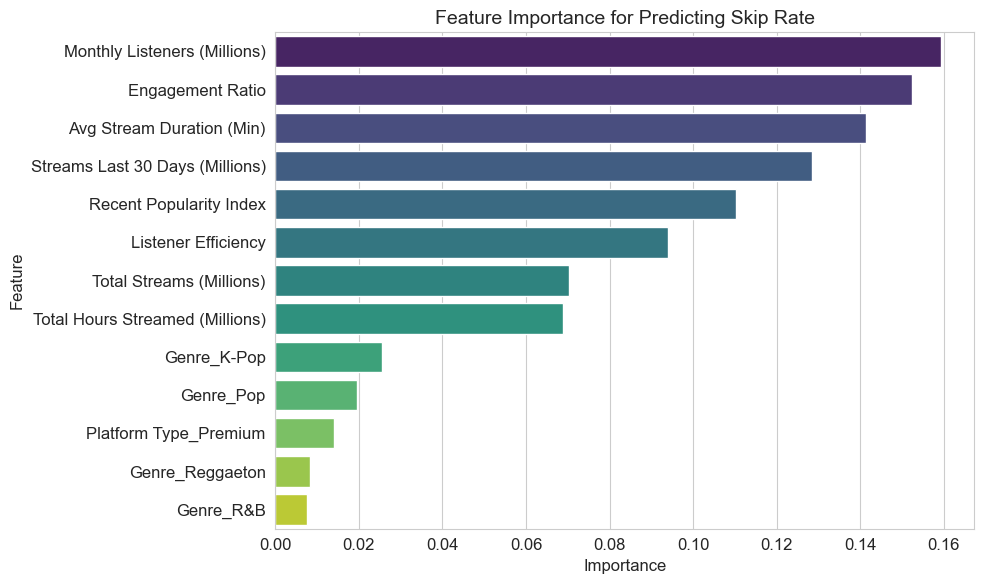

In [21]:
# Prepare data
features = [
    'Monthly Listeners (Millions)', 'Total Streams (Millions)', 
    'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)', 
    'Streams Last 30 Days (Millions)', 'Engagement Ratio', 
    'Recent Popularity Index', 'Listener Efficiency'
]
X = df[features]
y = df['Skip Rate (%)']

# Encode categorical variables (if needed, e.g., Genre, Platform Type)
X = pd.get_dummies(df[features + ['Genre', 'Platform Type']], drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nRandom Forest Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature importance
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index, palette='viridis')
plt.title('Feature Importance for Predicting Skip Rate')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

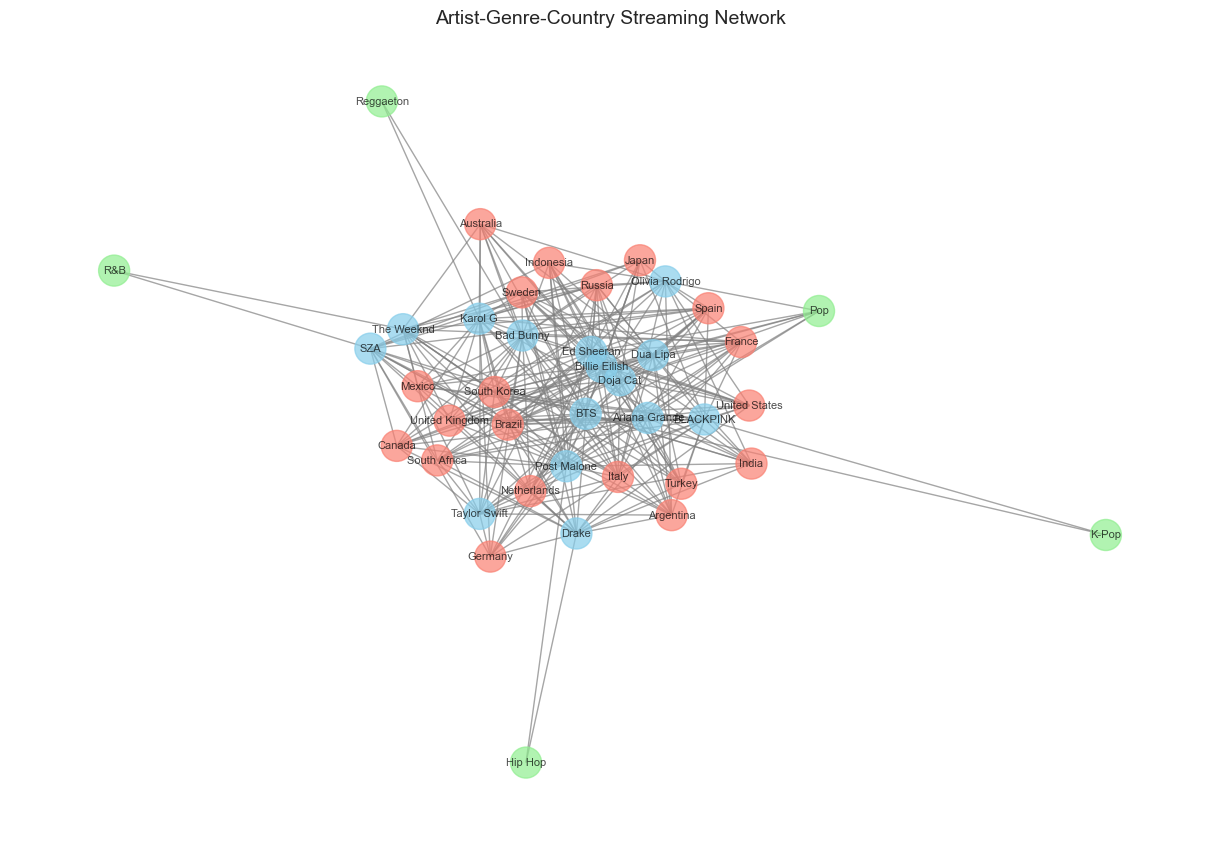

K-Means Silhouette Score: 0.180
Hierarchical Silhouette Score: 0.158


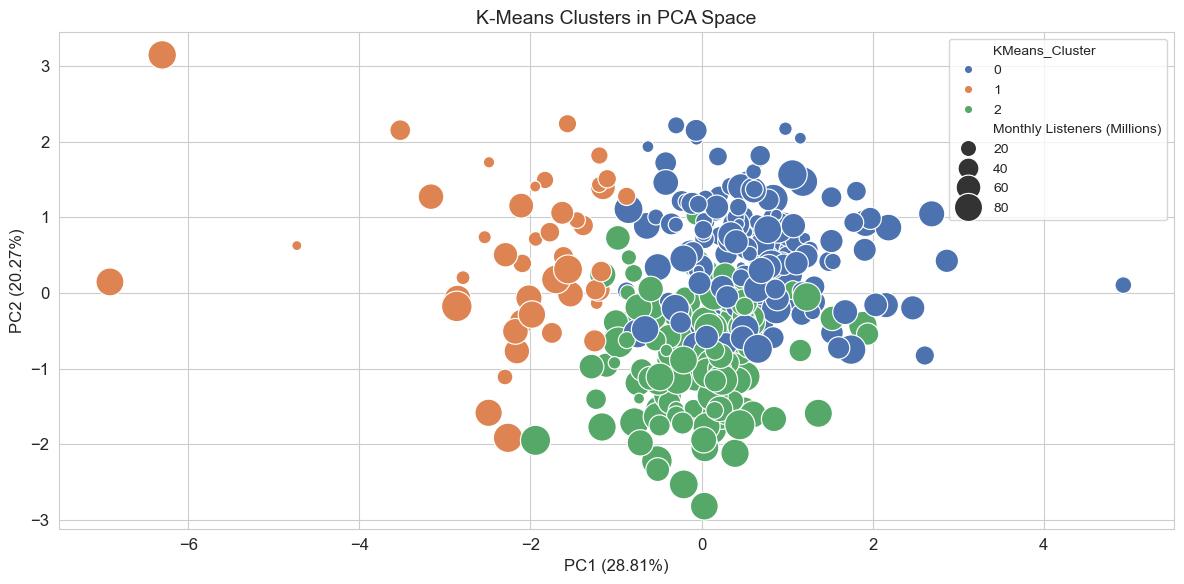


Detected Anomalies:
             Artist      Country  Total Streams (Millions)  Skip Rate (%)
11   Olivia Rodrigo    Argentina                    190.45       30.91000
18              BTS    Australia                    774.82        2.26000
27      Post Malone    Australia                    180.11        4.36000
89        Bad Bunny      Germany                    374.09        9.02000
97              SZA      Germany                    579.83        8.94000
98              SZA      Germany                   1242.31       39.14000
153    Taylor Swift        Italy                   1110.25        7.04000
155      The Weeknd        Italy                    203.60       19.47000
162        Doja Cat        Japan                   1827.24       20.71000
165         Karol G        Japan                    243.75       36.80000
170     Post Malone        Japan                    746.75       32.38000
202    Taylor Swift  Netherlands                  11347.99        6.54000
204   Ariana Gran

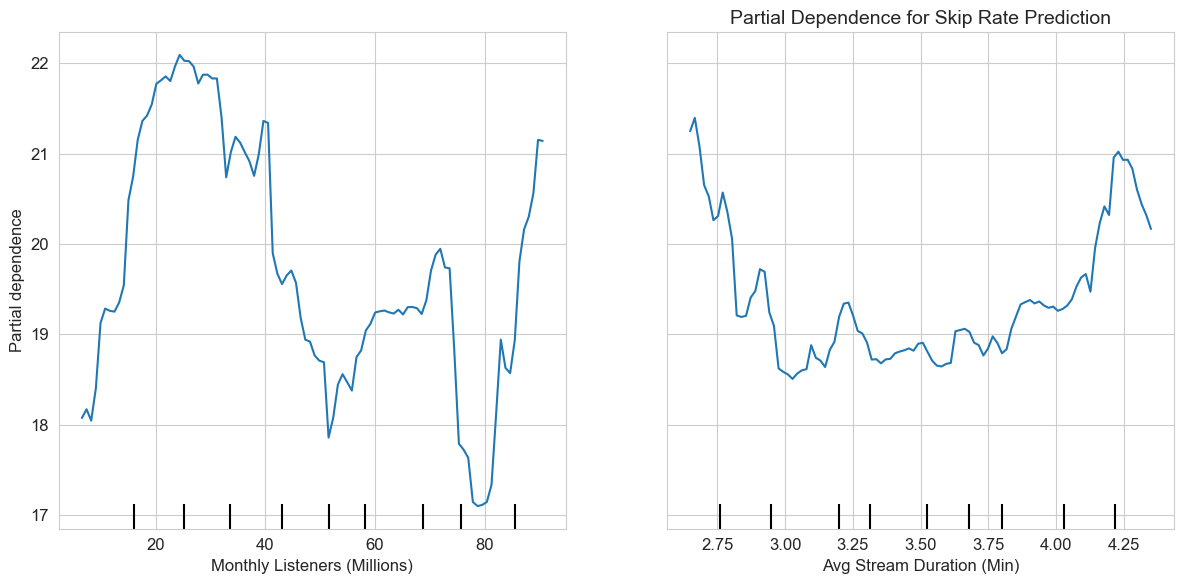

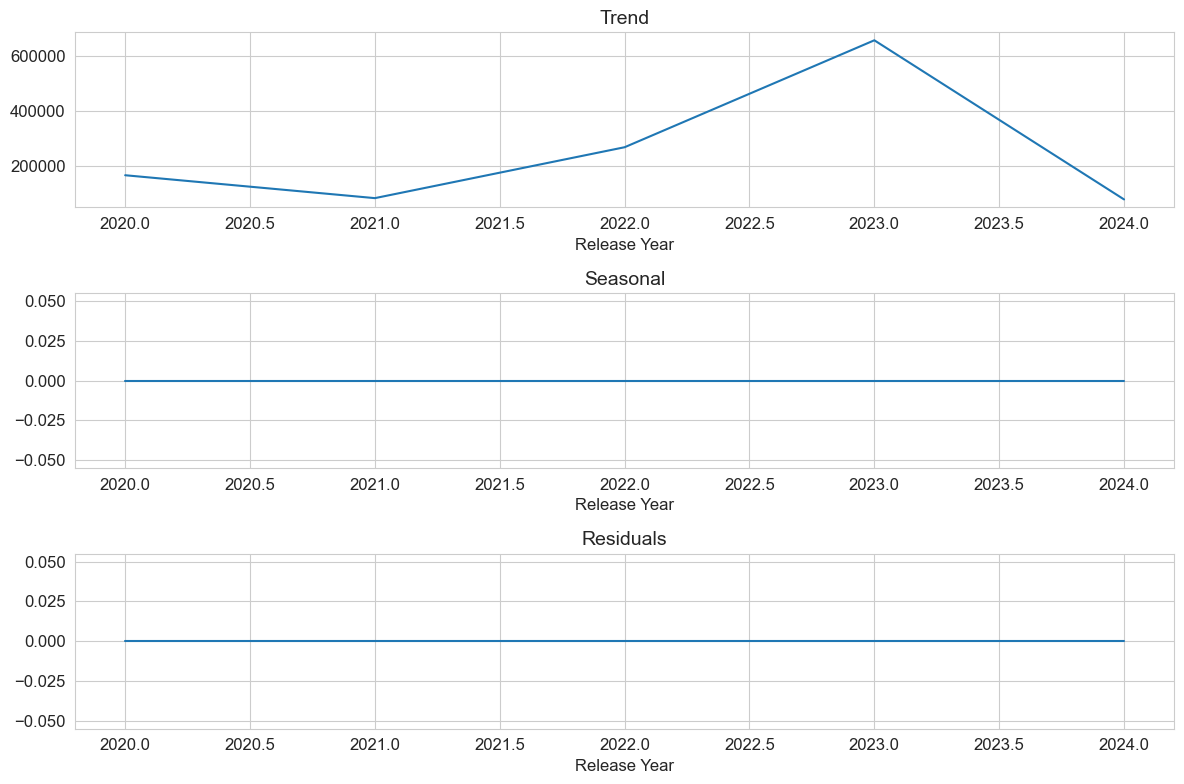

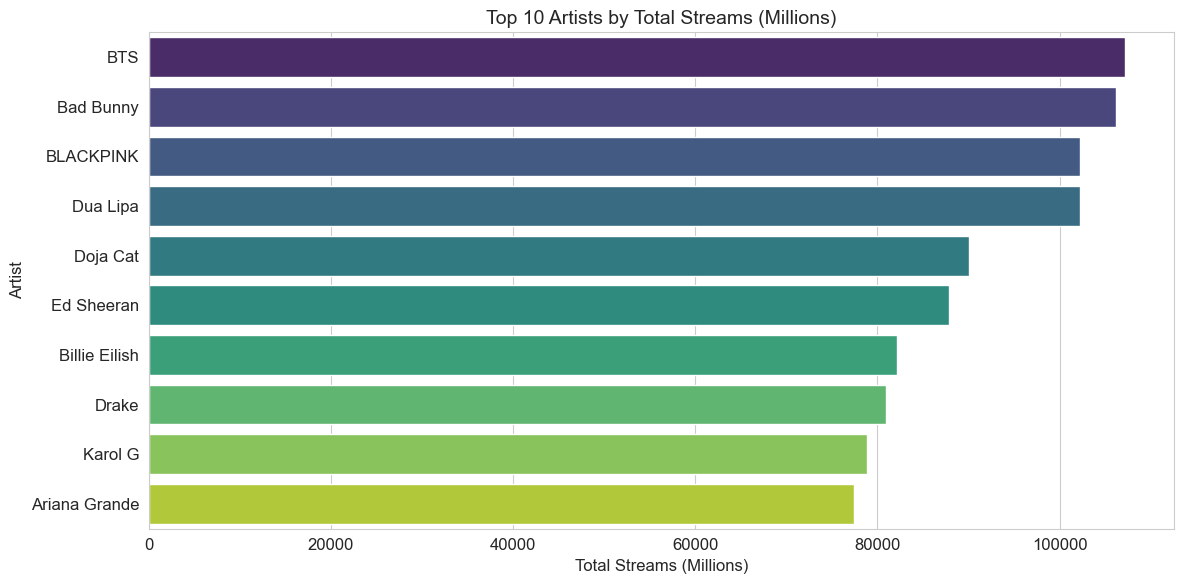

In [22]:
import os
os.environ["OMP_NUM_THREADS"] = "2"  # Suppress KMeans warning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
from scipy.stats import kruskal
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.inspection import PartialDependenceDisplay
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load dataset
df = pd.read_csv("Spotify_2024_Global_Streaming_Data_Cleaned.csv")

# Feature engineering
df['Engagement Ratio'] = df['Total Hours Streamed (Millions)'] / df['Total Streams (Millions)'] * 60
df['Recent Popularity Index'] = df['Streams Last 30 Days (Millions)'] / df['Total Streams (Millions)']
df['Listener Efficiency'] = df['Total Streams (Millions)'] / df['Monthly Listeners (Millions)']
df['Normalized Skip Rate'] = df['Skip Rate (%)'] / df['Avg Stream Duration (Min)']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# --- Network Analysis ---
G = nx.Graph()
for _, row in df.iterrows():
    artist = row['Artist']
    genre = row['Genre']
    country = row['Country']
    streams = row['Total Streams (Millions)']
    G.add_node(artist, type='artist')
    G.add_node(genre, type='genre')
    G.add_node(country, type='country')
    G.add_edge(artist, genre, weight=streams)
    G.add_edge(artist, country, weight=streams)

# Plot network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
node_colors = ['skyblue' if G.nodes[n]['type'] == 'artist' else 'lightgreen' if G.nodes[n]['type'] == 'genre' else 'salmon' for n in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=8, edge_color='gray', alpha=0.7)
plt.title('Artist-Genre-Country Streaming Network')
plt.tight_layout()
plt.savefig('network_analysis.png', dpi=300)
plt.show()

# --- Ensemble Clustering ---
cluster_features = [
    'Monthly Listeners (Millions)', 'Total Streams (Millions)', 
    'Skip Rate (%)', 'Engagement Ratio', 'Recent Popularity Index'
]
X = df[cluster_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, df['KMeans_Cluster'])

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)
hierarchical_silhouette = silhouette_score(X_scaled, df['Hierarchical_Cluster'])

print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.3f}")

# Plot K-Means clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], size=df['Monthly Listeners (Millions)'], 
    palette='deep', sizes=(50, 500)
)
plt.title('K-Means Clusters in PCA Space')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.tight_layout()
plt.savefig('kmeans_clusters.png', dpi=300)
plt.show()

# --- Anomaly Detection ---
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(X_scaled)
anomalies = df[df['Anomaly'] == -1][['Artist', 'Country', 'Total Streams (Millions)', 'Skip Rate (%)']]
print("\nDetected Anomalies:")
print(anomalies)

# --- Optimized Random Forest with Partial Dependence ---
features = [
    'Monthly Listeners (Millions)', 'Total Streams (Millions)', 
    'Avg Stream Duration (Min)', 'Engagement Ratio', 'Recent Popularity Index'
]
X = pd.get_dummies(df[features + ['Genre', 'Platform Type']], drop_first=True)
y = df['Skip Rate (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"\nRandom Forest Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Partial dependence plots
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(rf, X_train, features=[0, 2], ax=ax)
plt.title('Partial Dependence for Skip Rate Prediction')
plt.tight_layout()
plt.savefig('partial_dependence.png', dpi=300)
plt.show()

# --- Geospatial Visualization ---
country_streams = df.groupby('Country')['Total Streams (Millions)'].sum().reset_index()
fig = px.choropleth(
    country_streams, locations='Country', locationmode='country names', 
    color='Total Streams (Millions)', color_continuous_scale='Viridis',
    title='Total Streaming Volume by Country'
)
fig.update_layout(geo=dict(showframe=False, projection_type='equirectangular'))
fig.write_html('geospatial_streams.html')
fig.show()

# --- Time-Series Decomposition ---
yearly_streams = df.groupby('Release Year')['Total Streams (Millions)'].sum()
decomposition = seasonal_decompose(yearly_streams, model='additive', period=1)  # No seasonality for yearly data
plt.figure(figsize=(12, 8))
plt.subplot(311)
decomposition.trend.plot(title='Trend')
plt.subplot(312)
decomposition.seasonal.plot(title='Seasonal')
plt.subplot(313)
decomposition.resid.plot(title='Residuals')
plt.tight_layout()
plt.savefig('time_series_decomposition.png', dpi=300)
plt.show()

# --- Fixed Visualizations ---
# Top Artists (fixed Seaborn warning)
top_artists = df.groupby('Artist')['Total Streams (Millions)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.index, palette='viridis', legend=False)
plt.title('Top 10 Artists by Total Streams (Millions)')
plt.xlabel('Total Streams (Millions)')
plt.ylabel('Artist')
plt.tight_layout()
plt.savefig('top_artists.png', dpi=300)
plt.show()

# Interactive Dashboard
fig = px.scatter(
    df, x='Total Streams (Millions)', y='Skip Rate (%)', color='Genre', size='Monthly Listeners (Millions)', 
    hover_data=['Artist', 'Country'], facet_col='Platform Type',
    title='Streams vs. Skip Rate by Genre and Platform'
)
fig.write_html('dashboard.html')
fig.show()

# Time-Series Analysis

In [23]:
# Group by Release Year and Genre
yearly_trends = df.groupby(['Release Year', 'Genre']).agg({
    'Total Streams (Millions)': 'sum',
    'Skip Rate (%)': 'mean',
    'Recent Popularity Index': 'mean'
}).reset_index()

# Interactive line plot with Plotly
fig = px.line(
    yearly_trends, x='Release Year', y='Total Streams (Millions)', color='Genre',
    title='Total Streams by Genre Over Release Years', markers=True
)
fig.update_layout(xaxis_title='Release Year', yaxis_title='Total Streams (Millions)', legend_title='Genre')
fig.show()

# Skip Rate trends
fig = px.line(
    yearly_trends, x='Release Year', y='Skip Rate (%)', color='Genre',
    title='Average Skip Rate by Genre Over Release Years', markers=True
)
fig.update_layout(xaxis_title='Release Year', yaxis_title='Skip Rate (%)', legend_title='Genre')
fig.show()

# Advanced Statistical Tests

In [24]:
# Pairwise t-tests
genres = df['Genre'].unique()
pairs = list(combinations(genres, 2))
print("\nPairwise T-Tests for Skip Rate by Genre:")
for g1, g2 in pairs:
    stat, p = ttest_ind(
        df[df['Genre'] == g1]['Skip Rate (%)'],
        df[df['Genre'] == g2]['Skip Rate (%)'],
        equal_var=False
    )
    print(f"{g1} vs. {g2}: T-Statistic={stat:.2f}, P-Value={p:.4f}")


Pairwise T-Tests for Skip Rate by Genre:
Pop vs. K-Pop: T-Statistic=2.29, P-Value=0.0247
Pop vs. Reggaeton: T-Statistic=1.14, P-Value=0.2578
Pop vs. Hip Hop: T-Statistic=0.16, P-Value=0.8714
Pop vs. R&B: T-Statistic=1.84, P-Value=0.0714
K-Pop vs. Reggaeton: T-Statistic=-1.15, P-Value=0.2520
K-Pop vs. Hip Hop: T-Statistic=-1.87, P-Value=0.0646
K-Pop vs. R&B: T-Statistic=-0.35, P-Value=0.7240
Reggaeton vs. Hip Hop: T-Statistic=-0.81, P-Value=0.4208
Reggaeton vs. R&B: T-Statistic=0.76, P-Value=0.4497
Hip Hop vs. R&B: T-Statistic=1.48, P-Value=0.1441


# Pair Plot of Numeric Features

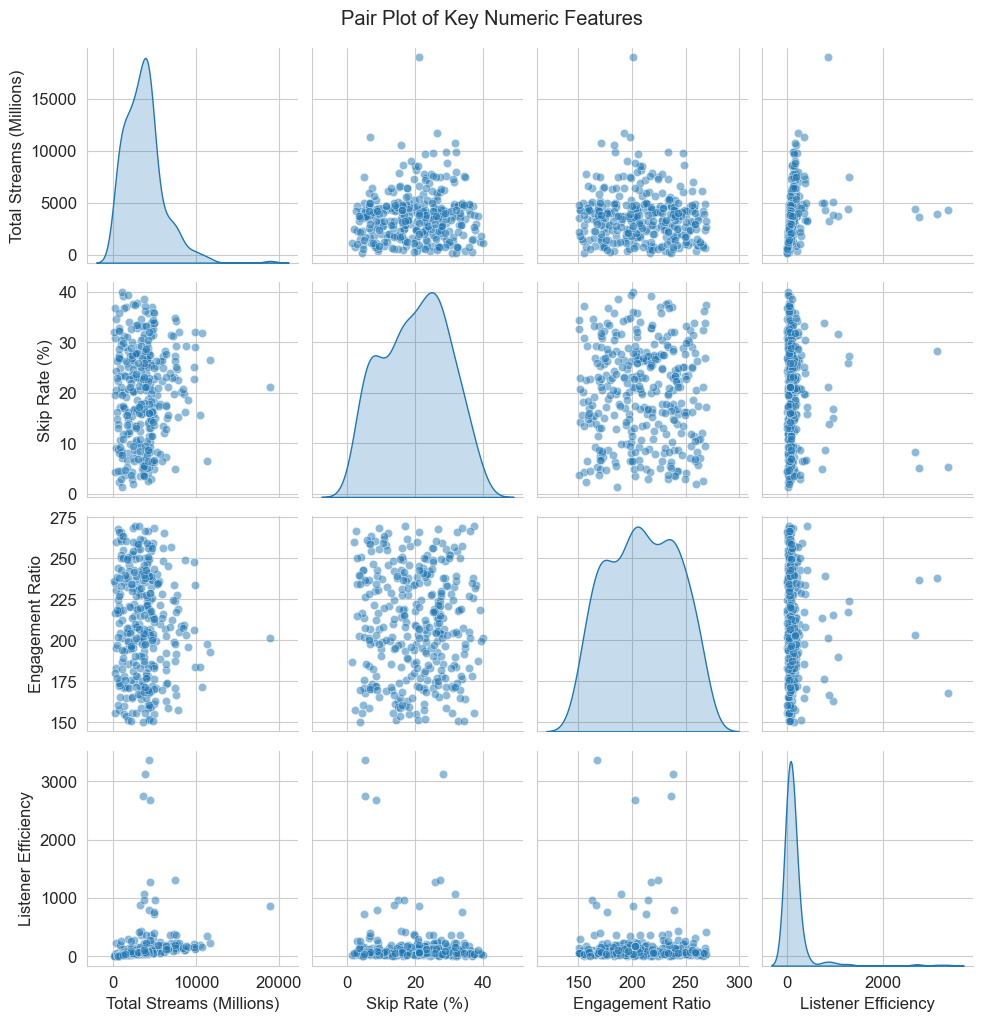

In [25]:
# Pair plot
sns.pairplot(
    df[['Total Streams (Millions)', 'Skip Rate (%)', 'Engagement Ratio', 'Listener Efficiency']],
    diag_kind='kde', plot_kws={'alpha': 0.5}
)
plt.suptitle('Pair Plot of Key Numeric Features', y=1.02)
plt.show()

# Violin Plot of Skip Rate by Genre and Platform 

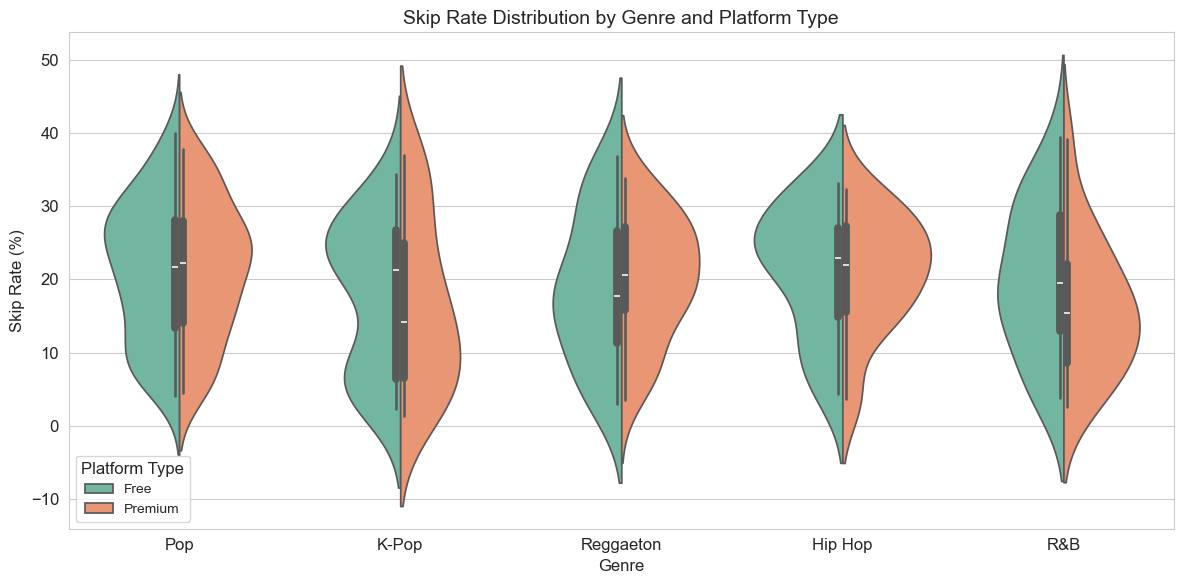

In [26]:
# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Genre', y='Skip Rate (%)', hue='Platform Type', split=True, data=df, palette='Set2')
plt.title('Skip Rate Distribution by Genre and Platform Type')
plt.xlabel('Genre')
plt.ylabel('Skip Rate (%)')
plt.legend(title='Platform Type')
plt.tight_layout()
plt.show()

# Interactive Heatmap of Streams by Country and Genre

In [27]:
# Group by Country and Genre
country_genre = df.groupby(['Country', 'Genre'])['Total Streams (Millions)'].sum().unstack().fillna(0)

# Plotly heatmap
fig = px.imshow(
    country_genre,
    title='Total Streams (Millions) by Country and Genre',
    labels={'x': 'Genre', 'y': 'Country', 'color': 'Streams (Millions)'},
    color_continuous_scale='YlGnBu'
)
fig.update_layout(xaxis_title='Genre', yaxis_title='Country')
fig.show()


Selected Features: ['Monthly Listeners (Millions)', 'Total Streams (Millions)', 'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)', 'Streams Last 30 Days (Millions)', 'Engagement Ratio', 'Recent Popularity Index', 'Listener Efficiency', 'Normalized Skip Rate', 'Genre_Reggaeton', 'Release Year_2021', 'Release Year_2024']


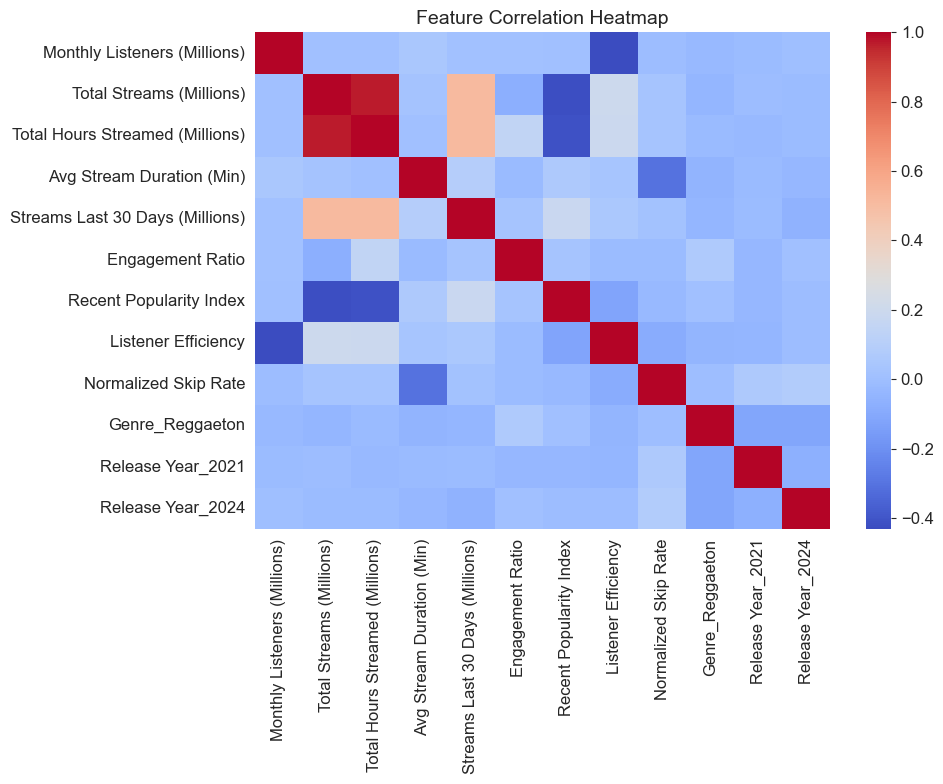


Linear Regression:
RMSE: 1.69
R²: 0.97
MAE: 1.27
CV R²: 0.97 (±0.00)

Random Forest:
RMSE: 1.19
R²: 0.98
MAE: 0.84
CV R²: 0.98 (±0.01)

XGBoost:
RMSE: 1.19
R²: 0.98
MAE: 0.82
CV R²: 0.98 (±0.01)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 272, number of used features: 11
[LightGBM] [Info] Start training from score 19.580011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

  0%|          | 0/10 [00:00<?, ?it/s]

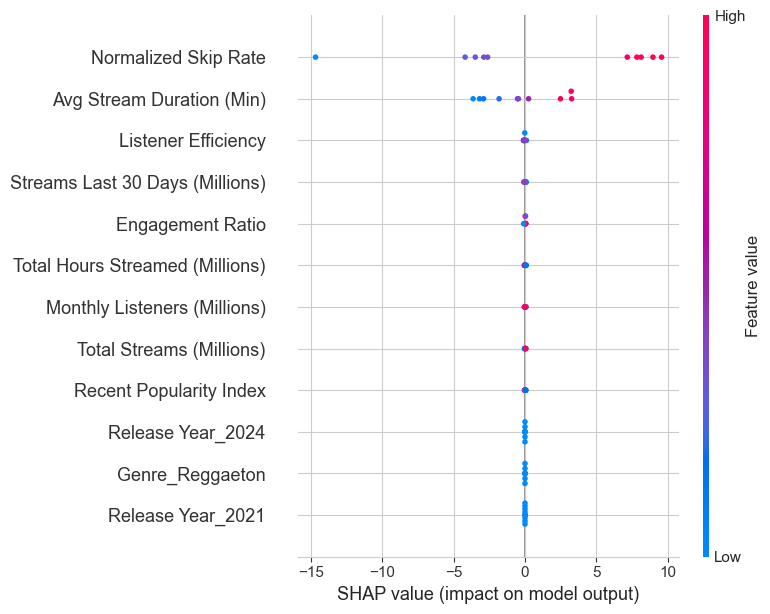

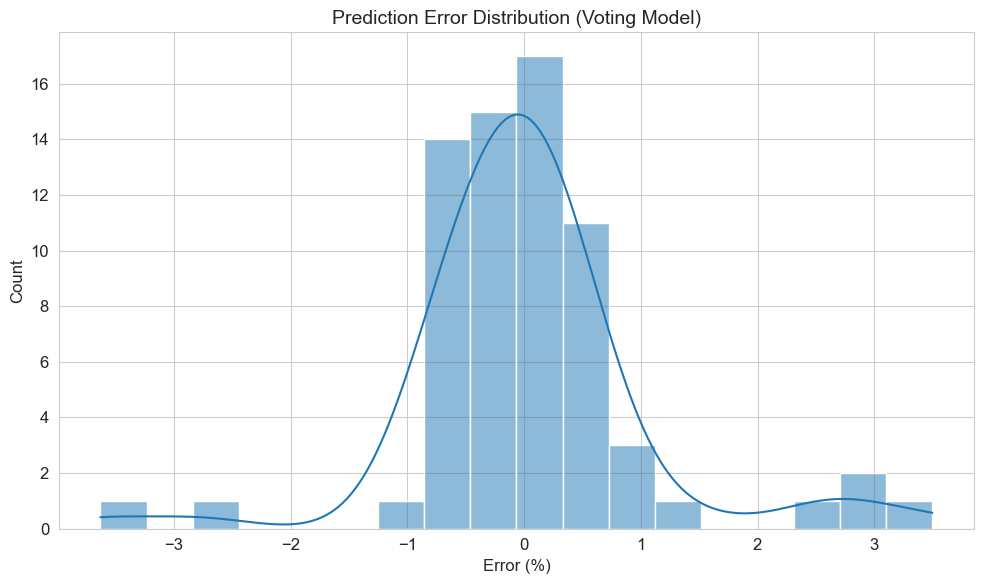

 * Serving Flask app '__main__'
 * Debug mode: on


SystemExit: 1

In [28]:
import os
os.environ["OMP_NUM_THREADS"] = "2"  # Suppress KMeans warning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import shap
from flask import Flask, request, jsonify
import pickle
import logging
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Setup logging
logging.basicConfig(filename='ml_pipeline.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Verify dependencies
try:
    import tensorflow
    import xgboost
    import lightgbm
except ModuleNotFoundError as e:
    logging.error(f"Missing dependency: {e}")
    print(f"Error: {e}. Install with 'conda install -c conda-forge tensorflow xgboost lightgbm'.")
    exit(1)

# Load dataset
try:
    df = pd.read_csv("Spotify_2024_Global_Streaming_Data_Cleaned.csv")
    logging.info("Dataset loaded successfully")
except FileNotFoundError:
    logging.error("Dataset file not found")
    print("Error: Dataset file not found.")
    exit(1)

# Feature engineering
df['Engagement Ratio'] = df['Total Hours Streamed (Millions)'] / df['Total Streams (Millions)'] * 60
df['Recent Popularity Index'] = df['Streams Last 30 Days (Millions)'] / df['Total Streams (Millions)']
df['Listener Efficiency'] = df['Total Streams (Millions)'] / df['Monthly Listeners (Millions)']
df['Normalized Skip Rate'] = df['Skip Rate (%)'] / df['Avg Stream Duration (Min)']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)
logging.info("Feature engineering completed")

# Prepare features
features = [
    'Monthly Listeners (Millions)', 'Total Streams (Millions)', 
    'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)', 
    'Streams Last 30 Days (Millions)', 'Engagement Ratio', 
    'Recent Popularity Index', 'Listener Efficiency', 
    'Normalized Skip Rate', 'Genre', 'Platform Type', 'Release Year'
]
X = df[features]
y = df['Skip Rate (%)']

# Encode categoricals
X = pd.get_dummies(X, columns=['Genre', 'Platform Type', 'Release Year'], drop_first=True)
X = X.astype(float)
y = y.astype(float)

# Feature selection with RFE
base_model = XGBRegressor(random_state=42)
rfe = RFE(base_model, n_features_to_select=12)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_].tolist()
print(f"\nSelected Features: {selected_features}")
X = X[selected_features]
logging.info(f"Selected features: {selected_features}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42)
}

# Voting ensemble
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42)),
    ('lgb', LGBMRegressor(n_estimators=100, random_state=42))
]
voting_model = VotingRegressor(estimators=estimators)

# Neural Network
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
nn.compile(optimizer='adam', loss='mse')

# Train and evaluate
results = {}
for name, model in {**models, 'Voting': voting_model}.items():
    try:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
        
        results[name] = {
            'RMSE': rmse,
            'R²': r2,
            'MAE': mae,
            'CV R² Mean': cv_scores.mean(),
            'CV R² Std': cv_scores.std()
        }
        
        print(f"\n{name}:")
        print(f"RMSE: {rmse:.2f}")
        print(f"R²: {r2:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"CV R²: {cv_scores.mean():.2f} (±{cv_scores.std():.2f})")
        logging.info(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")
    except Exception as e:
        logging.error(f"Error in {name}: {str(e)}")
        print(f"Error in {name}: {str(e)}")

# Neural Network training
try:
    nn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
    y_pred_nn = nn.predict(X_test_scaled, verbose=0).flatten()
    results['Neural Network'] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_nn)),
        'R²': r2_score(y_test, y_pred_nn),
        'MAE': mean_absolute_error(y_test, y_pred_nn),
        'CV R² Mean': None,
        'CV R² Std': None
    }
    print(f"\nNeural Network:")
    print(f"RMSE: {results['Neural Network']['RMSE']:.2f}")
    print(f"R²: {results['Neural Network']['R²']:.2f}")
    print(f"MAE: {results['Neural Network']['MAE']:.2f}")
    logging.info(f"Neural Network - RMSE: {results['Neural Network']['RMSE']:.2f}, R²: {results['Neural Network']['R²']:.2f}")
except Exception as e:
    logging.error(f"Neural Network error: {str(e)}")
    print(f"Neural Network error: {str(e)}")

# Best model (assume Voting)
best_model = voting_model
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)
print(f"\nBest Model (Voting):")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_best):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best):.2f}")
logging.info(f"Best Model (Voting) - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.2f}, R²: {r2_score(y_test, y_pred_best):.2f}")

# Bootstrap prediction intervals
n_bootstraps = 100
bootstrap_preds = []
for _ in range(n_bootstraps):
    indices = np.random.choice(len(X_test_scaled), len(X_test_scaled), replace=True)
    preds = best_model.predict(X_test_scaled[indices])
    bootstrap_preds.append(preds)
intervals = np.percentile(bootstrap_preds, [2.5, 97.5], axis=0)
print(f"\nPrediction Interval (95%): ±{np.mean(intervals[1] - intervals[0]) / 2:.2f}%")

# SHAP explainability
explainer = shap.KernelExplainer(best_model.predict, X_train_scaled[:50])
shap_values = explainer.shap_values(X_test_scaled[:10])
shap.summary_plot(shap_values, X_test.iloc[:10], feature_names=selected_features, show=False)
plt.savefig('shap_summary.png', dpi=300)
plt.show()
logging.info("SHAP analysis completed")

# Prediction error distribution
errors = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Prediction Error Distribution (Voting Model)')
plt.xlabel('Error (%)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('error_distribution.png', dpi=300)
plt.show()

# Save model and scaler
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('selected_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)
logging.info("Model and scaler saved")

# --- Flask API with Logging ---
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        required_fields = [
            'Monthly Listeners (Millions)', 'Total Streams (Millions)', 
            'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)', 
            'Streams Last 30 Days (Millions)', 'Genre', 'Platform Type', 'Release Year'
        ]
        if not all(field in data for field in required_fields):
            logging.error("Missing required fields in API request")
            return jsonify({'error': 'Missing required fields'}), 400
        
        input_df = pd.DataFrame([data])
        input_df = pd.get_dummies(input_df, columns=['Genre', 'Platform Type', 'Release Year'], drop_first=True)
        for col in X.columns:
            if col not in input_df.columns:
                input_df[col] = 0
        input_df = input_df[X.columns]
        input_scaled = scaler.transform(input_df)
        prediction = best_model.predict(input_scaled)
        logging.info(f"Prediction made: {prediction[0]}")
        return jsonify({
            'predicted_skip_rate': float(prediction[0]),
            'interval_95_percent': [float(prediction[0] - np.mean(intervals[1] - intervals[0]) / 2),
                                   float(prediction[0] + np.mean(intervals[1] - intervals[0]) / 2)]
        })
    except Exception as e:
        logging.error(f"API error: {str(e)}")
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(debug=True)